#BFS

In [ ]:
"""module for algorithm of bfs"""             ### НОВАЯ ВЕРСИЯ      
                                               #улучшено время
import bisect 
from collections import deque

def bfs_for_matrix(matrix, root):
    tree_matrix = [[0] * len(matrix) for i in range(len(matrix))] #возможно для 
                                                                  # экономии памяти использовать диагональную матрицу (если будет время) 
    queue = deque([root])      #очередь
    visited = [False for i in range(len(matrix))]             #посещенные вершины (флаги)
    visited[root] = True
    print('root', root)
    while queue:
        vertex = queue.popleft()
        for i in range(len(matrix)):        # проходим по соседям (все индексы)
            
            if matrix[vertex][i] == 1  and not visited[i]:
                print('i,ver', i,vertex)
                visited[i] = True 
                print('i',i)           
                queue.append(i)
                tree_matrix[vertex][i] = tree_matrix[i][vertex] = 1 # заполняем дерево 
    return tree_matrix


def bfs_for_list(list_, root):
    tree_list = [[] for i in range(len(list_))]
    
    queue = deque([root])      #очередь
    visited = [False for i in range(len(list_))]             #посещенные вершины (флаги)
    visited[root] = True

    while queue:
        vertex = queue.popleft()
        for neighbour in list_[vertex]:     # проходим по соседям
            if not visited[neighbour]:
                visited[neighbour] = True
                queue.append(neighbour)
                bisect.insort(tree_list[vertex],neighbour)     #заполняем дерево c сортировкой
                bisect.insort(tree_list[neighbour],vertex)   

    return tree_list


###Test_bfs

Input count while: 
1
1
[10000]
[14.320451498031616]
[12.614048480987549]
[3.4190118312835693]
[6.806705713272095]


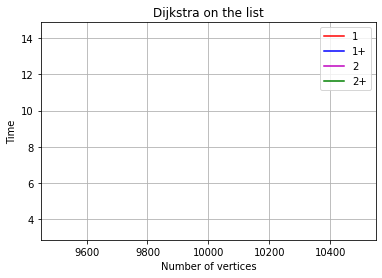

In [ ]:
########## TEST

""" Main class """
import time
import matplotlib.pyplot as plt
import random


def main():

    print('Input count while: ')
    count = int(input())
    interval = 10000
    x = [i for i in range(interval, count*interval+1, interval)]
    y_bfs_mat = [0 for i in range(count)]

    y_dfs_mat = [0 for i in range(count)]

    y_bfs_list = [0 for i in range(count)]

    y_dfs_list = [0 for i in range(count)]

    for i in range(count):
        count_time_bfs_mat = 0
        count_time_dfs_mat = 0
        count_time_bfs_list = 0
        count_tine_dfs_list = 0
        print(i+1)
        for j in range(1):
            rand_top = random.randint(0, interval-1)
            #print('rand_top = ', end=' ')
            #print(rand_top)
            graph_mat = AdjacencyMatrix(interval, 0.5)
            graph_list = AdjacencyList()
            graph_list.conversion_from_matrix_to_list(graph_mat.matrix)
            #print(graph_mat)
            #print(graph_list)
            
            start_time_bfs_mat = time.time()
            #distance_mat, path_mat = dijkstra_for_matrix(graph_mat.matrix, rand_top)
            tree_mat = bfs_for_matrix(graph_mat.matrix, rand_top-1)
            end_time_bfs_mat = time.time() - start_time_bfs_mat
            
            start_time_dfs_mat = time.time()
            ##tree_mat_new = bfs_for_matrix_new(graph_mat.matrix, rand_top-1)
            tree_mat_dfs = bfs_for_matrix_new(graph_mat.matrix, rand_top-1)
            #distance_list, path_list = dijkstra_for_list(graph_list.list_, rand_top)
            end_time_dfs_mat = time.time() - start_time_dfs_mat

            start_time_bfs_list = time.time()
            tree_list_bfs = bfs_for_list(graph_list.list_, rand_top-1)
            end_time_bfs_list = time.time() - start_time_bfs_list

            start_time_dfs_list = time.time()
            ##tree_list_bfs = bfs_for_list_new(graph_list.list_, rand_top-1)
            tree_list_dfs = bfs_for_list_new(graph_list.list_, rand_top-1)
            end_time_dfs_list = time.time() - start_time_dfs_list

            count_time_bfs_mat += end_time_bfs_mat
            count_time_dfs_mat += end_time_dfs_mat
            count_time_bfs_list += end_time_bfs_list
            count_tine_dfs_list += end_time_dfs_list
        interval += 100
        y_bfs_mat[i] = count_time_bfs_mat/count
        y_dfs_mat[i] = count_time_dfs_mat/count
        y_bfs_list[i] = count_time_bfs_list/count
        y_dfs_list[i] = count_tine_dfs_list/count

    print(x)
    print(y_bfs_mat)
    print(y_dfs_mat)
    print(y_bfs_list)
    print(y_dfs_list)

    plt.figure(1)
    plt.grid()
    plt.plot(x, y_bfs_mat, 'r', label='1')
    plt.plot(x, y_dfs_mat, 'b', label='1+')
    plt.plot(x, y_bfs_list, 'm', label='2')
    plt.plot(x, y_dfs_list, 'g', label='2+')
     #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    plt.ylabel('Time')
    plt.xlabel('Number of vertices')
    plt.title('Dijkstra on the list')
    plt.legend()
    plt.show()
    


if __name__ == "__main__":
    main()

# CENTRE

In [ ]:
"""module for center search algorithm in tree"""  ### НОВАЯ ВЕРСИЯ

import tree

def center_for_matrix(matrix):                         
    copy_matrix = [elem[:] for elem in matrix]
    not_visited = [1 for i in range(len(matrix))]
    count_leafs = 0   # количество вершин, которые можно посещать до 1 или 2
   
    while count_leafs != 1 and count_leafs != 2:

      leafs = []      
      for i in [k for k, j in enumerate(not_visited) if j == 1]:     # поиск листов
        if sum(copy_matrix[i]) == 1:
          leafs.append(i)
          not_visited[i] = 0
      for top in leafs:                      # удаление листа
        index = copy_matrix[top].index(1)
        copy_matrix[top][index] = copy_matrix[index][top] = 0      
      count_leafs = sum(not_visited)  
    
    center = [i+1 for i, j in enumerate(not_visited) if j == 1]    # вершины которые являются центром

    return center


def center_for_list(list_):
    list_copy = [elem[:] for elem in list_]
    not_visited = [1 for i in range(len(list_copy))]
    count_leafs = 0   # количество вершин, которые можно посещать до 1 или 2
    
    while count_leafs != 1 and count_leafs != 2:
      leafs = []
      for i in [k for k, j in enumerate(not_visited) if j == 1]:
         if len(list_copy[i]) == 1:
           leafs.append(i)
           not_visited[i] = 0
      for top in leafs:
        neighbour = list_copy[top]
        list_copy[neighbour[0]].remove(top)
      count_leafs = sum(not_visited)

    center = [i+1 for i, j in enumerate(not_visited) if j == 1]

    return center


###Test_center

Input count while: 
5
1
2
3
4
5
[500, 1000, 1500, 2000, 2500]
[4.300731801986695, 6.890589666366577, 9.154606199264526, 14.076088666915894, 17.602966213226317]
[0.17448101043701172, 0.25805068016052246, 0.3449268341064453, 0.44976210594177246, 0.5808218479156494]
[0.003868436813354492, 0.004591798782348633, 0.005164623260498047, 0.007714319229125977, 0.009322595596313477]
[0.028655385971069335, 0.044023561477661136, 0.053454923629760745, 0.08222084045410157, 0.1031299114227295]


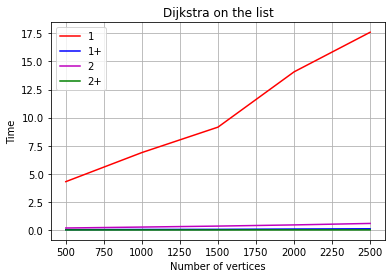

In [ ]:
""" Main class """
import time
import matplotlib.pyplot as plt
import random


def main():

    print('Input count while: ')
    count = int(input())
    interval = 500
    x = [i for i in range(interval, count*interval+1, interval)]
    y_bfs_mat = [0 for i in range(count)]

    y_dfs_mat = [0 for i in range(count)]

    y_bfs_list = [0 for i in range(count)]

    y_dfs_list = [0 for i in range(count)]

    for i in range(count):
        count_time_bfs_mat = 0
        count_time_dfs_mat = 0
        count_time_bfs_list = 0
        count_tine_dfs_list = 0
        print(i+1)
        for j in range(10):
            rand_top = random.randint(0, interval-1)
            #print('rand_top = ', end=' ')
            #print(rand_top)
            #graph_mat = AdjacencyMatrix(interval, 0.5)
            #graph_list = AdjacencyList()
            #graph_list.conversion_from_matrix_to_list(graph_mat.matrix)
            terr = Tree(interval)
            #print(graph_mat)
            #print(graph_list)
            
            start_time_bfs_mat = time.time()
            #distance_mat, path_mat = dijkstra_for_matrix(graph_mat.matrix, rand_top)
            tree_mat = center_for_matrix(terr.matrix_tree.matrix)
            end_time_bfs_mat = time.time() - start_time_bfs_mat
            
            start_time_dfs_mat = time.time()
            ##tree_mat_new = bfs_for_matrix_new(graph_mat.matrix, rand_top-1)
            tree_mat_dfs = center_for_matrix_new(terr.matrix_tree.matrix)
            #distance_list, path_list = dijkstra_for_list(graph_list.list_, rand_top)
            end_time_dfs_mat = time.time() - start_time_dfs_mat

            start_time_bfs_list = time.time()
            tree_list_bfs = center_for_list(terr.list_tree.list_)
            end_time_bfs_list = time.time() - start_time_bfs_list

            start_time_dfs_list = time.time()
            ##tree_list_bfs = bfs_for_list_new(graph_list.list_, rand_top-1)
            tree_list_dfs = center_for_list_new(terr.list_tree.list_)
            end_time_dfs_list = time.time() - start_time_dfs_list

            count_time_bfs_mat += end_time_bfs_mat
            count_time_dfs_mat += end_time_dfs_mat
            count_time_bfs_list += end_time_bfs_list
            count_tine_dfs_list += end_time_dfs_list
        interval += 100
        y_bfs_mat[i] = count_time_bfs_mat/count
        y_dfs_mat[i] = count_time_dfs_mat/count
        y_bfs_list[i] = count_time_bfs_list/count
        y_dfs_list[i] = count_tine_dfs_list/count

    print(x)
    print(y_bfs_mat)
    print(y_bfs_list)
    print(y_dfs_list)
    print(y_dfs_mat)

    plt.figure(1)
    plt.grid()
    plt.plot(x, y_bfs_mat, 'r', label='1')
    plt.plot(x, y_dfs_mat, 'b', label='1+')
    plt.plot(x, y_bfs_list, 'm', label='2')
    plt.plot(x, y_dfs_list, 'g', label='2+')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    plt.ylabel('Time')
    plt.xlabel('Number of vertices')
    plt.title('Dijkstra on the list')
    plt.legend()
    plt.show()


if __name__ == "__main__":
    main()

#CENTROID


НОВЫЙ

In [ ]:
"""module for centroid search algorithm in tree"""   ###НОВАЯ ВЕРСИЯ

import tree

def size_of_subgraph_for_matrix(matrix, root, neighbour):     # размер подграфа
    stack = [neighbour]
    path = []
    while stack:
        vertex = stack.pop()
        if vertex in path:
            continue
        path.append(vertex)
        for i in range(len(matrix)):
            if matrix[vertex][i] != 0:  #просмотр соседей
              if i == root:
                continue         
              stack.append(i)             
    return len(path)

def weight_of_vertex_for_matrix(matrix, vertex):            # вес вершины
  weight = 0
  for neighbour in range(len(matrix)):
    if matrix[vertex][neighbour] == 1:
      weight_neighbour = size_of_subgraph_for_matrix(matrix,vertex,neighbour)
      
      if weight < weight_neighbour:
        weight = weight_neighbour
  return weight


def size_of_subgraph_for_list(list_, root, neighbour):     # размер подграфа
    stack = [neighbour]
    path = []
    while stack:
        vertex = stack.pop()
        if vertex in path:
            continue
        path.append(vertex)
        for neighbour in list_[vertex]:
          if neighbour == root:
            continue
          stack.append(neighbour)             
    return len(path)

def weight_of_vertex_for_list(list_, vertex):            # вес вершины
  weight = 0
  for neighbour in list_[vertex]:
    weight_neighbour = size_of_subgraph_for_list(list_,vertex,neighbour)
    
    if weight < weight_neighbour:
      weight = weight_neighbour
  return weight

def centroid_for_matrix(matrix):
    centroid = []

    degree_vertex = sum(matrix[0])        # Выбор вершины с наибольшей степенью
    root = 0
    for i in range(len(matrix)): 
      if degree_vertex < sum(matrix[i]):
        degree_vertex = sum(matrix[i])
        root = i

    weight_root = weight_of_vertex_for_matrix(matrix,root)
   
    flag = True
    while flag:

      for neighbour in range(len(matrix)):
        if matrix[root][neighbour] == 1:          
          if sum(matrix[neighbour]) == 1:   # лист 
            flag = False
            continue
          else:
            weight_neighbour = weight_of_vertex_for_matrix(matrix,neighbour)
            
          if weight_neighbour > weight_root:
            flag = False
            continue
          elif weight_neighbour < weight_root:
            root = neighbour
            weight_root = weight_neighbour
            flag = True
            break
          else:
            centroid.append(root)           
            centroid.append(neighbour)
            flag = False
            break
          
    if not centroid:
      centroid.append(root)

    return centroid


def centroid_for_list(list_):
    centroid = []

    degree_vertex = len(list_[0])        # Выбор вершины с наибольшей степенью
    root = 0
    for i in range(len(list_)): 
      if degree_vertex < len(list_[i]):
        degree_vertex = len(list_[i])
        root = i

    weight_root = weight_of_vertex_for_list(list_,root)

   
    flag = True
    while flag:

      for neighbour in list_[root]:                
        if len(list_[neighbour]) == 1:   # лист 
          flag = False
          continue
        else:
          weight_neighbour = weight_of_vertex_for_list(list_,neighbour)
          
        if weight_neighbour > weight_root:
          flag = False
          continue
        elif weight_neighbour < weight_root:
          root = neighbour
          weight_root = weight_neighbour
          flag = True
          break
        else:
          centroid.append(root)           
          centroid.append(neighbour)
          flag = False
          break
          
    if not centroid:
      centroid.append(root)

    return centroid

In [ ]:
terr = Tree(10)
terr.matrix_tree.matrix
#terr.list_tree.list_

[[0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 1, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 0, 0, 1, 0, 0]]

In [ ]:
centroid_for_list_new(terr.list_tree.list_)

[9]

###Test_centroid

Input count while: 
1
2
3
4
5
6
7
8
9
10
[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
[0.05252203941345215, 0.24470844268798828, 0.863131070137024, 1.71238169670105, 4.14910728931427, 5.01756649017334, 9.17367582321167, 17.303872990608216, 15.733866024017335, 38.684439754486085]
[0.008719038963317872, 0.035049152374267575, 0.08608067035675049, 0.18194999694824218, 0.3036713838577271, 0.536245322227478, 0.7591127634048462, 1.3911669254302979, 1.523127269744873, 2.20736346244812]
[0.0017024040222167968, 0.007120943069458008, 0.020685505867004395, 0.036985254287719725, 0.08222751617431641, 0.09582183361053467, 0.1629688024520874, 0.29304137229919436, 0.2807549715042114, 0.6109713792800904]
[0.010720300674438476, 0.04846525192260742, 0.15145235061645507, 0.29503297805786133, 0.6518924951553344, 0.7501922130584717, 1.2815970659255982, 2.353415369987488, 2.112667608261108, 4.650892519950867]


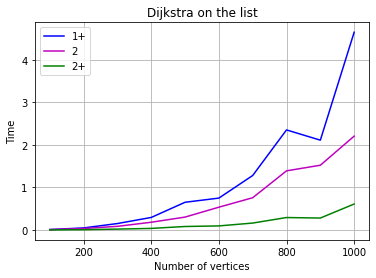

In [ ]:
""" Main class """
import time
import matplotlib.pyplot as plt
import random


def main():

    print('Input count while: ')
    count = int(input())
    interval = 100
    x = [i for i in range(interval, count*interval+1, interval)]
    y_bfs_mat = [0 for i in range(count)]

    y_dfs_mat = [0 for i in range(count)]

    y_bfs_list = [0 for i in range(count)]

    y_dfs_list = [0 for i in range(count)]

    for i in range(count):
        count_time_bfs_mat = 0
        count_time_dfs_mat = 0
        count_time_bfs_list = 0
        count_tine_dfs_list = 0
        print(i+1)
        for j in range(10):
            rand_top = random.randint(0, interval-1)
            #print('rand_top = ', end=' ')
            #print(rand_top)
            #graph_mat = AdjacencyMatrix(interval, 0.5)
            #graph_list = AdjacencyList()
            #graph_list.conversion_from_matrix_to_list(graph_mat.matrix)
            terr = Tree(interval)
            #print(graph_mat)
            #print(graph_list)
            
            start_time_bfs_mat = time.time()
            #distance_mat, path_mat = dijkstra_for_matrix(graph_mat.matrix, rand_top)
            tree_mat = centroid_for_matrix(terr.matrix_tree.matrix)
            end_time_bfs_mat = time.time() - start_time_bfs_mat
            
            start_time_dfs_mat = time.time()
            ##tree_mat_new = bfs_for_matrix_new(graph_mat.matrix, rand_top-1)
            tree_mat_dfs = centroid_for_matrix_new(terr.matrix_tree.matrix)
            #distance_list, path_list = dijkstra_for_list(graph_list.list_, rand_top)
            end_time_dfs_mat = time.time() - start_time_dfs_mat

            start_time_bfs_list = time.time()
            tree_list_bfs = centroid_for_list(terr.list_tree.list_)
            end_time_bfs_list = time.time() - start_time_bfs_list

            start_time_dfs_list = time.time()
            ##tree_list_bfs = bfs_for_list_new(graph_list.list_, rand_top-1)
            tree_list_dfs = centroid_for_list_new(terr.list_tree.list_)
            end_time_dfs_list = time.time() - start_time_dfs_list

            count_time_bfs_mat += end_time_bfs_mat
            count_time_dfs_mat += end_time_dfs_mat
            count_time_bfs_list += end_time_bfs_list
            count_tine_dfs_list += end_time_dfs_list
        interval += 100
        y_bfs_mat[i] = count_time_bfs_mat/count
        y_dfs_mat[i] = count_time_dfs_mat/count
        y_bfs_list[i] = count_time_bfs_list/count
        y_dfs_list[i] = count_tine_dfs_list/count

    print(x)
    print(y_bfs_mat)
    print(y_bfs_list)
    print(y_dfs_list)
    print(y_dfs_mat)

    plt.figure(1)
    plt.grid()
    plt.plot(x, y_bfs_mat, 'r', label='1')
    plt.plot(x, y_dfs_mat, 'b', label='1+')
    plt.plot(x, y_bfs_list, 'm', label='2')
    plt.plot(x, y_dfs_list, 'g', label='2+')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    plt.ylabel('Time')
    plt.xlabel('Number of vertices')
    plt.title('Dijkstra on the list')
    plt.legend()
    plt.show()


if __name__ == "__main__":
    main()

In [ ]:
x = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
y_bfs_mat = [0.05252203941345215, 0.24470844268798828, 0.863131070137024, 1.71238169670105, 4.14910728931427, 5.01756649017334, 9.17367582321167, 17.303872990608216, 15.733866024017335, 38.684439754486085]
y_bfs_list = [0.008719038963317872, 0.035049152374267575, 0.08608067035675049, 0.18194999694824218, 0.3036713838577271, 0.536245322227478, 0.7591127634048462, 1.3911669254302979, 1.523127269744873, 2.20736346244812]
y_dfs_list = [0.0017024040222167968, 0.007120943069458008, 0.020685505867004395, 0.036985254287719725, 0.08222751617431641, 0.09582183361053467, 0.1629688024520874, 0.29304137229919436, 0.2807549715042114, 0.6109713792800904]
y_dfs_mat = [0.010720300674438476, 0.04846525192260742, 0.15145235061645507, 0.29503297805786133, 0.6518924951553344, 0.7501922130584717, 1.2815970659255982, 2.353415369987488, 2.112667608261108, 4.650892519950867]


In [ ]:
import matplotlib.pyplot as plt

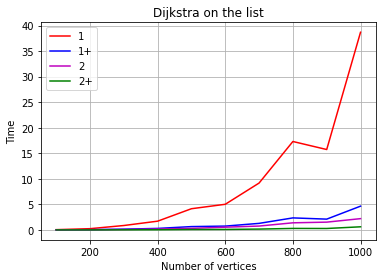

In [ ]:

plt.figure(2)
plt.grid()
plt.plot(x, y_bfs_mat, 'r', label='1')
plt.plot(x, y_dfs_mat, 'b', label='1+')
plt.plot(x, y_bfs_list, 'm', label='2')
plt.plot(x, y_dfs_list, 'g', label='2+')
#plt.plot(x, y_dfs_list, 'g', label='DFS-list')
plt.ylabel('Time')
plt.xlabel('Number of vertices')
plt.title('Dijkstra on the list')
plt.legend()
plt.show()

# DFS

In [ ]:
"""module for algorithm dfs"""   ### НОВАЯ ВЕРСИЯ

import bisect
from collections import deque

def dfs_for_matrix(matrix, root):
    tree_matrix = [[0] * len(matrix) for i in range(len(matrix))]  #можно использовать диагональную матрицу для экономия памяти   
    
    stack = deque([root])      #стек / чтобы избежать рекурсии
    visited =  [False for i in range(len(matrix))]            #посещенные вершины (флаги)
    visited[root] = True
    #print('stack = ', root)
    while stack:
        flag_neighbour = False                      
        vertex = stack[-1]
        #print('pop st = ', vertex)
        for i in range(len(matrix)):
            if matrix[vertex][i] != 0 and not visited[i]:  #просмотр соседей
                flag_neighbour  = True
                visited[i] = True
                #print('in st =', i)
                stack.append(i)
                #print('edge =', vertex,i, '   !!!!   ')
                tree_matrix[vertex][i] = tree_matrix[i][vertex] = 1    # заполняем дерево                   
                break                 
        if not flag_neighbour and stack:
            stack.pop()
            #print('out stack =', stack.pop()) 
    return tree_matrix


def dfs_for_list(list_, root):
    tree_list = [[] for i in range(len(list_))]

    stack = deque([root])      #стек / чтобы избежать рекурсии
    visited = [False for i in range(len(list_))]            #посещенные вершины (флаги)
    visited[root] = True

    while stack:
        flag_neighbour = False  
        vertex = stack[-1]
        for neighbour in list_[vertex]:
          if not visited[neighbour]:               
                flag_neighbour = True
                visited[neighbour] = True
                stack.append(neighbour)
                #print(neighbour)                
                bisect.insort(tree_list[vertex], neighbour)     #заполняем дерево
                bisect.insort(tree_list[neighbour],vertex) 
                break
        if not flag_neighbour:
            stack.pop()     
    return tree_list


In [ ]:
tmp = AdjacencyMatrix(6,probability=0.2)

###Test_dfs

Input count while: 
5
1
2
3
4
5
[500, 1000, 1500, 2000, 2500]
[0.10831623077392578, 0.1418271541595459, 0.19056544303894044, 0.21513700485229492, 0.26832284927368166]
[0.018171358108520507, 0.025397109985351562, 0.03346748352050781, 0.0681877613067627, 0.08131399154663085]
[0.03594331741333008, 0.05440950393676758, 0.06946940422058105, 0.09204635620117188, 0.14031853675842285]
[0.08240694999694824, 0.12320919036865234, 0.16565723419189454, 0.2192507266998291, 0.2777699947357178]


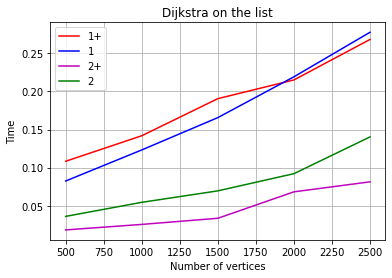

In [ ]:
""" Main class """
import time
import matplotlib.pyplot as plt
import random


def main():

    print('Input count while: ')
    count = int(input())
    interval = 500
    x = [i for i in range(interval, count*interval+1, interval)]
    y_bfs_mat = [0 for i in range(count)]

    y_dfs_mat = [0 for i in range(count)]

    y_bfs_list = [0 for i in range(count)]

    y_dfs_list = [0 for i in range(count)]

    for i in range(count):
        count_time_bfs_mat = 0
        count_time_dfs_mat = 0
        count_time_bfs_list = 0
        count_tine_dfs_list = 0
        print(i+1)
        for j in range(10):
            rand_top = random.randint(0, interval-1)
            #print('rand_top = ', end=' ')
            #print(rand_top)
            graph_mat = AdjacencyMatrix(interval, 0.5)
            graph_list = AdjacencyList()
            graph_list.conversion_from_matrix_to_list(graph_mat.matrix)
            #print(graph_mat)
            #print(graph_list)
            
            start_time_bfs_mat = time.time()
            #distance_mat, path_mat = dijkstra_for_matrix(graph_mat.matrix, rand_top)
            tree_mat = dfs_for_matrix_new(graph_mat.matrix, rand_top-1)
            end_time_bfs_mat = time.time() - start_time_bfs_mat
            
            start_time_dfs_mat = time.time()
            ##tree_mat_new = bfs_for_matrix_new(graph_mat.matrix, rand_top-1)
            tree_mat_dfs = dfs_for_matrix(graph_mat.matrix, rand_top-1)
            #distance_list, path_list = dijkstra_for_list(graph_list.list_, rand_top)
            end_time_dfs_mat = time.time() - start_time_dfs_mat

            start_time_bfs_list = time.time()
            tree_list_bfs = dfs_for_list_new(graph_list.list_, rand_top-1)
            end_time_bfs_list = time.time() - start_time_bfs_list

            start_time_dfs_list = time.time()
            ##tree_list_bfs = bfs_for_list_new(graph_list.list_, rand_top-1)
            tree_list_dfs = dfs_for_list(graph_list.list_, rand_top-1)
            end_time_dfs_list = time.time() - start_time_dfs_list

            count_time_bfs_mat += end_time_bfs_mat
            count_time_dfs_mat += end_time_dfs_mat
            count_time_bfs_list += end_time_bfs_list
            count_tine_dfs_list += end_time_dfs_list
        interval += 100
        y_bfs_mat[i] = count_time_bfs_mat/count
        y_dfs_mat[i] = count_time_dfs_mat/count
        y_bfs_list[i] = count_time_bfs_list/count
        y_dfs_list[i] = count_tine_dfs_list/count

    print(x)
    print(y_bfs_mat)
    print(y_bfs_list)
    print(y_dfs_list)
    print(y_dfs_mat)

    plt.figure(1)
    plt.grid()
    plt.plot(x, y_bfs_mat, 'r', label='1+')
    plt.plot(x, y_dfs_mat, 'b', label='1')
    plt.plot(x, y_bfs_list, 'm', label='2+')
    plt.plot(x, y_dfs_list, 'g', label='2')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    plt.ylabel('Time')
    plt.xlabel('Number of vertices')
    plt.title('Dijkstra on the list')
    plt.legend()
    plt.show()


if __name__ == "__main__":
    main()

#DIJKSTRA

###Старая

In [ ]:
"""module for finding the shortest paths in a graph (Dijkstra's algorithm)"""   ### СТАРАЯ ВЕРСИЯ

import random

#from weighted_graph import GraphList, GraphMatrix


def dijkstra_for_matrix_old(graph_, src):
  
    graph = [elem[:] for elem in graph_]
    length = len(graph)
    nodes = [i for i in range(length)]
    visited = [src]
    path_ = {src: {src: []}}
    nodes.remove(src)
    distance_graph = {src: 0}
    pre = next_ = src

    while nodes:
        distance_ = float('inf')
        for v in visited:
            for d in nodes:
                new_dist = graph[src][v] + graph[v][d]
                if new_dist <= distance_:
                    distance_ = new_dist
                    next_ = d
                    pre = v
                    graph[src][d] = new_dist

        path_[src][next_] = [i for i in path_[src][pre]]
        path_[src][next_].append(next_)

        distance_graph[next_] = distance_

        visited.append(next_)
        nodes.remove(next_)

    return distance_graph, path_


# N = int(input())

# Matrix = GraphMatrix(N)
# print(Matrix)
# distance, path = dijkstra_for_matrix(Matrix.matrix, 1)
# print(distance, '\n', path)

# ##_______________________________________LIST__________________________________________________## #


def dijkstra_for_list_old(graph, start):
    shortest_distance = {}
    predecessor = {}
    unseenNodes = graph
    infinity = float('inf')
    path_ = {start: {start: []}}
    for node in unseenNodes:
        shortest_distance[node] = infinity
    shortest_distance[start] = 0
    next_ = start

    while unseenNodes:
        minNode = None
        for node in unseenNodes:
            if minNode is None:
                minNode = node
            elif shortest_distance[node] < shortest_distance[minNode]:
                minNode = node

        for childNode, weight in graph[minNode].items():
            if weight + shortest_distance[minNode] < shortest_distance[childNode]:
                shortest_distance[childNode] = weight + shortest_distance[minNode]
                predecessor[childNode] = minNode
                next_ = childNode
                path_[start][next_] = [i for i in path_[start][predecessor[childNode]]]
                path_[start][next_].append(next_)

        unseenNodes.pop(minNode)

    return shortest_distance, path_


#List_ = GraphList(N)
#print(List_.list_)
#print(List_)
#distance, path = dijkstra_for_list(List_.list_, 1)
#print(distance, '\n', path)


###Пробная

In [ ]:
###Пробная

"""module for finding the shortest paths in a graph (Dijkstra's algorithm)"""   ### НОВАЯ ВЕРСИЯ

import random

#from weighted_graph import GraphList, GraphMatrix


def dijkstra_for_matrix(graph, root):
  
  dist = [float('inf') for i in range(len(graph))]
  visited = [False for i in range(len(graph))]
  dist[root] = 0

  pred = [0 for i in range(len(graph))]
    
  for i in range(len(graph)):
    vertex = -1
    for j in range(len(graph)):
      if not visited[j] and (vertex == -1 or dist[j]<dist[vertex]):
        vertex = j
        
    if dist[vertex] == float('inf'):
      break
    visited[vertex] = True
    
    for j in range(len(graph[vertex])):
      if graph[vertex][j] != 0:          
        weight = graph[vertex][j]
        
        if dist[vertex] + weight < dist[j]:
          
          dist[j] = dist[vertex] + weight
          pred[j] = vertex
          

  return dist, pred


# N = int(input())

# Matrix = GraphMatrix(N)
# print(Matrix)
# distance, path = dijkstra_for_matrix(Matrix.matrix, 1)
# print(distance, '\n', path)

# ##_______________________________________LIST__________________________________________________## #


def dijkstra_for_list(graph, start):
    shortest_distance = {}
    predecessor = {}
    unseenNodes = graph
    infinity = float('inf')
    path_ = {start: {start: []}}
    for node in unseenNodes:
        shortest_distance[node] = infinity
    shortest_distance[start] = 0
    next_ = start

    while unseenNodes:
        minNode = None
        for node in unseenNodes:
            if minNode is None:
                minNode = node
            elif shortest_distance[node] < shortest_distance[minNode]:
                minNode = node

        for childNode, weight in graph[minNode].items():
            if weight + shortest_distance[minNode] < shortest_distance[childNode]:
                shortest_distance[childNode] = weight + shortest_distance[minNode]
                predecessor[childNode] = minNode
                next_ = childNode
                path_[start][next_] = [i for i in path_[start][predecessor[childNode]]]
                path_[start][next_].append(next_)

        unseenNodes.pop(minNode)

    return shortest_distance, path_


#List_ = GraphList(N)
#print(List_.list_)
#print(List_)
#distance, path = dijkstra_for_list(List_.list_, 1)
#print(distance, '\n', path)

###НОВАЯ ЛУЧШАЯ *переделать на списке смежности*

In [ ]:
"""module for finding the shortest paths in a graph (Dijkstra's algorithm)"""   ### НОВАЯ ВЕРСИЯ

import random
import time

#from weighted_graph import GraphList, GraphMatrix


def dijkstra_for_matrix(matrix, root):
    
    pred = [-1 for i in range(len(matrix))]
    dist = [float('inf') for i in range(len(matrix))]
    nodes = [i for i in range(len(matrix))]  
    nodes.remove(root)
    dist[root] = 0

    star = time.time()

    for item in nodes:     
      if matrix[root][item]!= 0:
        dist[item] = matrix[root][item]
        pred[item] = root 
    end_ = time.time() - star
    
    print('matr = ', end_)
    #star = time.time()
    while nodes:

      min_dist = float('inf')
      vertex = -1
      for item in nodes:
        min_ = dist[item]
        if min_dist > min_:
          min_dist = min_
          vertex = item

      nodes.remove(vertex) 
    
      for item in nodes:
        if matrix[vertex][item] != 0:
          new_dist = dist[vertex] + matrix[vertex][item]
          if new_dist < dist[item]:
            pred[item] = vertex
            dist[item] = new_dist 
   # end_ = time.time() - star
    
   # print('matr = ', end_)
    return dist, pred

# ##_______________________________________LIST__________________________________________________## #


def dijkstra_for_list(list_, root):
    #print(len(list_[root]))
    

    pred = [-1 for i in range(len(list_))]
    dist = [float('inf') for i in range(len(list_))]
    nodes = [i for i in range(len(list_))]  
    nodes.remove(root)
    dist[root] = 0

    start_ = time.time()
    for neighbour, cost in list_[root].items():
      dist[neighbour] = cost
      pred[neighbour] = root 
    
    end_k = time.time() - start_
    print('list =', end_k)
    #start_ = time.time()
    while nodes:

      min_dist = float('inf')
      vertex = -1
      for item in nodes:
        min_ = dist[item]
        if min_dist > min_:
          min_dist = min_
          vertex = item

      nodes.remove(vertex) 
    
      #for neighbour, cost in list_[vertex].items():
        #if neighbour in nodes:
         # new_dist = dist[vertex] + cost
          #if new_dist < dist[neighbour]:            
           # dist[neighbour] = new_dist
            #pred[neighbour] = vertex
      for item in nodes:
        if item in list_[vertex]:
         new_dist = dist[vertex] + list_[vertex][item]
         if new_dist < dist[item]:
           dist[item] = new_dist
           pred[item] = vertex  
   # end_k = time.time() - start_
   # print('list =', end_k)
    return dist, pred

In [ ]:
graph = GraphMatrix(10, probability=0.5)

In [ ]:
graph_l = GraphList(create=False)

In [ ]:
graph_l.conversion_from_matrix_to_list(graph.matrix)

In [ ]:
print(graph_l)

0 - [{1: 66} {2: 80} {4: 13} {5: 9} {6: 94} {8: 81} {9: 95}]
1 - [{0: 66} {2: 20} {4: 72} {8: 92}]
2 - [{0: 80} {1: 20} {3: 39} {5: 47} {7: 6} {9: 55}]
3 - [{2: 39} {4: 72} {5: 47} {6: 99}]
4 - [{0: 13} {1: 72} {3: 72} {5: 76} {6: 78} {7: 96} {9: 95}]
5 - [{0: 9} {2: 47} {3: 47} {4: 76} {6: 46} {7: 41} {8: 56}]
6 - [{0: 94} {3: 99} {4: 78} {5: 46} {7: 93} {8: 57} {9: 12}]
7 - [{2: 6} {4: 96} {5: 41} {6: 93} {8: 57} {9: 99}]
8 - [{0: 81} {1: 92} {5: 56} {6: 57} {7: 57} {9: 96}]
9 - [{0: 95} {2: 55} {4: 95} {6: 12} {7: 99} {8: 96}]



In [ ]:
start_time_bfs_mat = time.time()
distance, path = dijkstra_for_matrix(graph.matrix,4)
end_time_bfs_mat = time.time() - start_time_bfs_mat

matr =  3.0994415283203125e-06


In [ ]:
print(distance, '\n', path)

[69, 83, 54, 33, 0, 63, 29, 89, 39, 90] 
 [8, 6, 3, 4, -1, 4, 4, 4, 6, 7]


In [ ]:
start_time = time.time()
distance_pro, path_pro = dijkstra_for_list(graph_l.list_,4)
end_time = time.time() - start_time

list = 2.86102294921875e-06


In [ ]:
print(distance_pro, '\n', path_pro)

[13, 72, 69, 69, 0, 22, 68, 63, 78, 80] 
 [4, 4, 5, 5, -1, 0, 5, 5, 5, 6]


In [ ]:
start_time_bfs = time.time()
distance_old, path_old = dijkstra_for_matrix(graph.matrix,1)
end_time_bfs = time.time() - start_time_bfs

matr =  2.0742416381835938e-05


In [ ]:
print(distance_old, '\n', path_old)

{1: 0, 0: 37, 4: 40, 2: 56, 5: 57, 9: 60, 6: 66, 7: 72, 8: 73, 3: 75} 
 {1: {1: [], 0: [0], 4: [4], 2: [2], 5: [4, 5], 9: [4, 9], 6: [4, 6], 7: [4, 5, 7], 8: [0, 8], 3: [3]}}


### TEST

Input count while: 
2
1
2
[500, 1000]
[0.17030906677246094, 0.24669170379638672]
[0.17535173892974854, 0.2580620050430298]


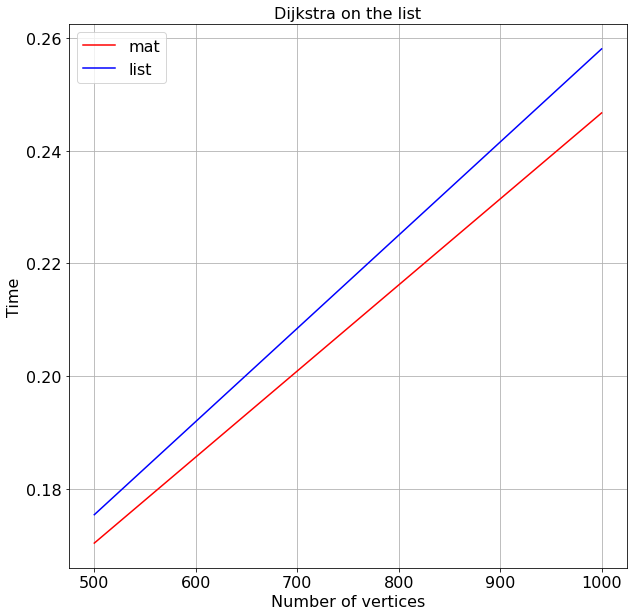

In [ ]:
""" Main class """
import time
import matplotlib.pyplot as plt
import random


def main():

    print('Input count while: ')
    count = int(input())
    interval = 500
    x = [i for i in range(interval, count*interval+1, interval)]
    y_bfs_mat = [0 for i in range(count)]

    y_dfs_mat = [0 for i in range(count)]

    y_bfs_list = [0 for i in range(count)]

    y_dfs_list = [0 for i in range(count)]

    for i in range(count):
        count_time_bfs_mat = 0
        count_time_dfs_mat = 0
        count_time_bfs_list = 0
        count_tine_dfs_list = 0
        print(i+1)
        for j in range(10):
            rand_top = random.randint(0, interval-1)
            #print('rand_top = ', end=' ')
            #print(rand_top)
            #graph_mat = AdjacencyMatrix(interval, 0.5)
            #graph_list = AdjacencyList()
            #graph_list.conversion_from_matrix_to_list(graph_mat.matrix)
            #print(graph_mat)
            #print(graph_list)
            graph_mat = GraphMatrix(interval, probability=0.9)
            graph_list = GraphList(create=False)
            graph_list.conversion_from_matrix_to_list(graph_mat.matrix)
            
            start_time_bfs_mat = time.time()
            #distance_mat, path_mat = dijkstra_for_matrix(graph_mat.matrix, rand_top)
            tree_mat, path_1 = dijkstra_for_matrix(graph_mat.matrix, rand_top)
            end_time_bfs_mat = time.time() - start_time_bfs_mat
            
            start_time_dfs_mat = time.time()
            ##tree_mat_new = bfs_for_matrix_new(graph_mat.matrix, rand_top-1)
            tree_mat_dfs, path_2 = dijkstra_for_list(graph_list.list_, rand_top)
            #distance_list, path_list = dijkstra_for_list(graph_list.list_, rand_top)
            end_time_dfs_mat = time.time() - start_time_dfs_mat

            for tmp in range(len(graph_mat.matrix)):
              for tuy in range(len(graph_mat.matrix)):
                if graph_mat.matrix[tmp][tuy] == 0 and tmp != tuy:
                  graph_mat.matrix[tmp][tuy] = float('inf')

            start_time_bfs_list = time.time()
           # tree_list_bfs, path_3 = dijkstra_for_matrix_old(graph_mat.matrix, rand_top)
            end_time_bfs_list = time.time() - start_time_bfs_list

            start_time_dfs_list = time.time()
            ##tree_list_bfs = bfs_for_list_new(graph_list.list_, rand_top-1)
            #print('hi')
            #tree_list_dfs = dfs_for_list(graph_list.list_, rand_top-1)
            end_time_dfs_list = time.time() - start_time_dfs_list

            count_time_bfs_mat += end_time_bfs_mat
            count_time_dfs_mat += end_time_dfs_mat
            count_time_bfs_list += end_time_bfs_list
            #count_tine_dfs_list += end_time_dfs_list
        interval += 100
        y_bfs_mat[i] = count_time_bfs_mat/count
        y_dfs_mat[i] = count_time_dfs_mat/count
        y_bfs_list[i] = count_time_bfs_list/count
        #y_dfs_list[i] = count_tine_dfs_list/count

    print(x)
    print(y_bfs_mat)
    #print(y_bfs_list)
    #print(y_dfs_list)
    print(y_dfs_mat)

    plt.figure(1,figsize=(10,10))
    plt.grid()
    plt.rc('legend', fontsize=16)
    #plt.rc('axis', fontsize=16)
    #plt.legend()
    plt.plot(x, y_bfs_mat, 'r', label='mat' )
    plt.plot(x, y_dfs_mat, 'b', label='list')
    #plt.plot(x, y_bfs_list, 'm', label='old')
    #plt.plot(x, y_dfs_list, 'g', label='2')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.ylabel('Time', fontsize=16)
    plt.xlabel('Number of vertices',fontsize=16)
    plt.title('Dijkstra on the list', fontsize=16)
    plt.legend()
    plt.show()


if __name__ == "__main__":
    main()

In [ ]:
x = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
y_bfs_mat = [0.03039236068725586, 0.0454329252243042, 0.060518622398376465, 0.08186655044555664, 0.09890978336334229, 0.12457215785980225, 0.1502894163131714, 0.17781312465667726, 0.20306265354156494, 0.2352753162384033]
y_bfs_list = [4.2819948434829715, 7.614258241653443, 12.17084355354309, 18.158422660827636, 25.46400043964386, 35.45206139087677, 47.2638295173645, 61.276099753379825, 77.69237623214721, 95.65679302215577]
y_dfs_mat = [0.06975839138031006, 0.10274975299835205, 0.14076457023620606, 0.1823589324951172, 0.2308718204498291, 0.28630881309509276, 0.3461636781692505, 0.4078369617462158, 0.48102900981903074, 0.5510273694992065]

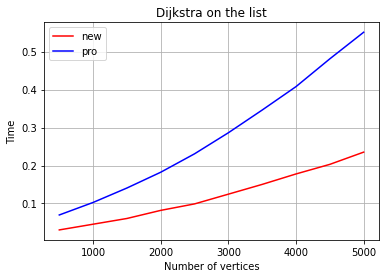

In [ ]:
    plt.figure(1)
    plt.grid()
    plt.plot(x, y_bfs_mat, 'r', label='new')
    plt.plot(x, y_dfs_mat, 'b', label='pro')
    #plt.plot(x, y_bfs_list, 'm', label='old')
    #plt.plot(x, y_dfs_list, 'g', label='2')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    plt.ylabel('Time')
    plt.xlabel('Number of vertices')
    plt.title('Dijkstra on the list')
    plt.legend()
    plt.show()

#GRAPH

In [ ]:
"""class for representing a graph as an adjacency list"""

import random

#from bfs import bfs_for_list, bfs_for_matrix
#from dfs import dfs_for_list, dfs_for_matrix


class AdjacencyList:   # (Доработать рандом)
    list_ = []

    def __init__(self, size=1, probability=0.5, create=True):
        self.list_ = [[] for i in range(size)]
        if create:
            self.list_[0].append(1)
            self.list_[size - 1].append(size - 2)
            for i in range(1, size - 1):
                self.list_[i].append(i - 1)
                self.list_[i].append(i + 1)
           # count = 0
            for i in range(size-2):
                for j in range(i+2,size):
                    random_probability = random.random()
                    #count = count + 1
                    #print(count)
                    if random_probability <= probability:                        
                        self.list_[i].append(j)
                        self.list_[j].append(i)
            for k in range(size):
                self.list_[k].sort()

    def __str__(self):
        string_list = ''
        i = 0
        for row in self.list_:
            string_list += (str(i) + ' - ' + ' '.join([str(elem) for elem in row]) + '\n')
            i += 1
        return string_list

    def conversion_from_matrix_to_list(self, matrix):  # можно подправить
        self.list_ = [[] for i in range(len(matrix))]
        for i in range(len(matrix)):
            for j in range(len(matrix)):
                if matrix[i][j] == 1:
                    self.list_[i].append(j)

# a = AdjacencyMatrix(4, 0.3)
# print(a)


# c = AdjacencyList(4, 0)

# c.conversion_from_matrix_to_list(a.matrix)
# print(c)


"""class for representing a graph as an adjacency matrix"""


class AdjacencyMatrix:

    matrix = []

    def __init__(self, size=1, probability=0.5, create=True):
        self.matrix = [[0] * size for i in range(size)]
        if create:
            for i in range(1, size):
                self.matrix[i - 1][i] = 1
                self.matrix[i][i - 1] = 1
            #count = 0
            for i in range(size):
                for j in range(2 + i, len(self.matrix[i])):
                    #count = count + 1
                    #print(count, i,j)
                    random_probability = random.random()
                    if random_probability <= probability:
                        self.matrix[i][j] = 1
                        self.matrix[j][i] = 1

    def __str__(self):
        string_matrix = ''
        for row in self.matrix:
            string_matrix += (' '.join([str(elem) for elem in row]) + '\n')
        return string_matrix

    def conversion_from_list_to_matrix(self, list_):   # можно подправить
        self.matrix = [[0] * len(list_) for i in range(len(list_))]
        for i in range(len(list_)):
            for j in range(len(list_[i])):
                self.matrix[i][list_[i][j]] = 1


# b = AdjacencyList(3)
# print(b)
# a = AdjacencyMatrix()
# print(a)
# a.conversion_from_list_to_matrix(b.list_)
# print(a)

# print(b)


In [ ]:
graph = AdjacencyList(5)

In [ ]:
pip install tarjan

#MAIN

In [ ]:
import matplotlib.pyplot as plt

###BFS-n'-DFS matrix

In [ ]:
""" Main class """
import time
import matplotlib.pyplot as plt
import random


def main():

    print('Input count of iter: ')
    count = int(input())
    count_vertex = 500
    interval = 500
    x = [i for i in range(count_vertex, count*count_vertex+1, count_vertex)]
    #print(x)
    y_bfs_mat = [0 for i in range(count)]

    y_dfs_mat = [0 for i in range(count)]

    #y_bfs_list = [0 for i in range(count)]

    #y_dfs_list = [0 for i in range(count)]
    count_graph = 10

    for i in range(count):
        count_time_bfs_mat = 0
        count_time_dfs_mat = 0
        #count_time_bfs_list = 0
        #count_tine_dfs_list = 0
        print('iter - ', i+1)
        for j in range(count_graph):
            #print('count_vertex =' ,count_vertex)
            rand_top = random.randint(0, count_vertex-1)
            #print('rand_top = ', end=' ')
            #print(rand_top)
            graph_mat = AdjacencyList(count_vertex, 0.2)#AdjacencyMatrix(count_vertex, 0.5)
            #graph_list = GraphList(create=False)#AdjacencyList()
            #graph_list.conversion_from_matrix_to_list(graph_mat.matrix)
            #print(graph_mat)
            #print(graph_list)
            start_time_bfs_mat = time.time()
            tree_bfs_mat = bfs_for_list(graph_mat.list_, rand_top)
            end_time_bfs_mat = time.time() - start_time_bfs_mat
            
            start_time_dfs_mat = time.time()
            tree_dfs_mat = dfs_for_list(graph_mat.list_, rand_top)
            end_time_dfs_mat = time.time() - start_time_dfs_mat

           # start_time_bfs_list = time.time()
           # tree_list_bfs = bfs_for_list(graph_list.list_, rand_top-1)
           # end_time_bfs_list = time.time() - start_time_bfs_list
           # start_time_dfs_list = time.time()
           # tree_list_dfs = dfs_for_list(graph_list.list_, rand_top-1)
           # end_time_dfs_list = time.time() - start_time_dfs_list

            count_time_bfs_mat += end_time_bfs_mat
            count_time_dfs_mat += end_time_dfs_mat
            #count_time_bfs_list += end_time_bfs_list
            #count_tine_dfs_list += end_time_dfs_list
        count_vertex += interval
        y_bfs_mat[i] = count_time_bfs_mat/count_graph
        y_dfs_mat[i] = count_time_dfs_mat/count_graph
        #y_bfs_list[i] = count_time_bfs_list/count
        #y_dfs_list[i] = count_tine_dfs_list/count

    print(x)
    print(y_bfs_mat)
    print(y_dfs_mat)
   # print(y_bfs_list)
   # print(y_dfs_list)

    plt.figure(figsize=(13,9))   
    plt.rc('legend', fontsize=16)
    #plt.rc('axis', fontsize=16)
    #plt.legend()
    
    #plt.plot(x, y_bfs_mat, 'o-r', label='BFS-matrix', lw=2, ms=7)
    #plt.plot(x, y_dfs_mat, 'o-b', label='DFS-matrix', lw=2, ms=7)
    ax = plt.gca()
    #ax.axhline(y=0, color='k')
    #plt.plot([], [], ' ', label="Graph density - 0.2")
    bfs = ax.plot(x, y_bfs_mat, 'o-r', label='BFS-list', lw=2, ms=7)
    dfs = ax.plot(x, y_dfs_mat, 'o-b', label='DFS-list', lw=2, ms=7)
    #ax.set_xticks(x)
    #plt.plot(x, y_bfs_list, 'm', label='old')
    #plt.plot(x, y_dfs_list, 'g', label='2')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    
    #plt.plot([], [], ' ', label="dgfgfjgkhj")
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', labelsize=16) 
    plt.ylabel('Time, sec ', fontsize=16, labelpad =12)
    plt.xlabel('Number of vertices',fontsize=16, labelpad =12)
    plt.grid(True)
    plt.grid(which='major', linewidth = 1)
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()
    plt.title('BFS and DFS Algorithms on Adjacency List', fontsize=18, pad=15)    
    plt.legend(title ="Graph density - 0.2",title_fontsize=16)
    
    plt.show()



if __name__ == "__main__":
    main()



Input count of iter: 


KeyboardInterrupt: ignored

###Данные

In [ ]:
#BFS n' DFS on matrix 0.2

x = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
y_bfs_mat = [0.018416643142700195, 0.0770716667175293, 0.2016394853591919, 0.3387021541595459, 0.5150734186172485, 0.8524894475936889, 1.1775267839431762, 1.3721324920654296, 1.7477533340454101, 2.084705853462219, 2.6370208740234373, 2.8816776990890505, 3.531234073638916, 4.075443744659424, 4.712262535095215, 5.636057877540589, 6.064952445030213, 6.891795015335083, 7.730733060836792, 8.729131388664246]
y_dfs_mat = [0.02706565856933594, 0.11237282752990722, 0.2596211671829224, 0.4770265817642212, 0.7423297882080078, 1.0458834648132325, 1.439961886405945, 1.9468361377716064, 2.4735923528671266, 3.0302180528640745, 3.6607404947280884, 4.4480236053466795, 5.1203752040863035, 5.968657350540161, 6.844720315933228, 7.731664609909058, 8.817921161651611, 9.823376560211182, 10.999064540863037, 12.47685203552246]


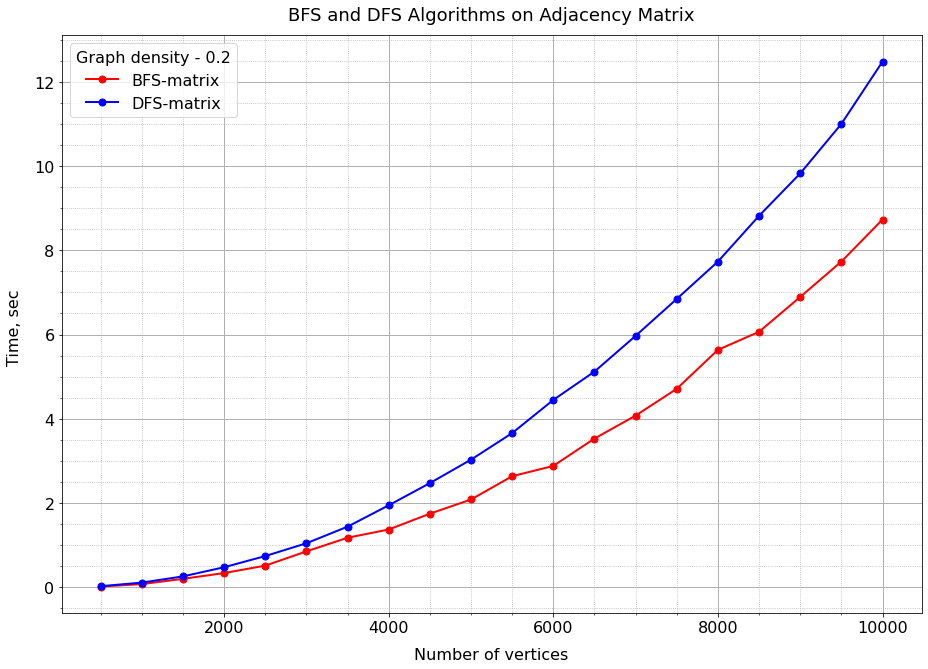

In [ ]:
    plt.figure(figsize=(13,9))   
    plt.rc('legend', fontsize=16)
    #plt.rc('axis', fontsize=16)
    #plt.legend()
    
    #plt.plot(x, y_bfs_mat, 'o-r', label='BFS-matrix', lw=2, ms=7)
    #plt.plot(x, y_dfs_mat, 'o-b', label='DFS-matrix', lw=2, ms=7)
    ax = plt.gca()
    #ax.axhline(y=0, color='k')
    #plt.plot([], [], ' ', label="Graph density - 0.2")
    bfs = ax.plot(x, y_bfs_mat, 'o-r', label='BFS-matrix', lw=2, ms=7)
    dfs = ax.plot(x, y_dfs_mat, 'o-b', label='DFS-matrix', lw=2, ms=7)
    #ax.set_xticks(x)
    #plt.plot(x, y_bfs_list, 'm', label='old')
    #plt.plot(x, y_dfs_list, 'g', label='2')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    
    #plt.plot([], [], ' ', label="dgfgfjgkhj")
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', labelsize=16) 
    plt.ylabel('Time, sec ', fontsize=16, labelpad =12)
    plt.xlabel('Number of vertices',fontsize=16, labelpad =12)
    plt.grid(True)
    plt.grid(which='major', linewidth = 1)
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()
    plt.title('BFS and DFS Algorithms on Adjacency Matrix', fontsize=18, pad=15)    
    plt.legend(title ="Graph density - 0.2",title_fontsize=16)
    
    plt.show()

In [ ]:
#BFS n' DFS on matrix 0.5
x =    [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
y_bfs_mat =      [0.02032592296600342, 0.09130253791809081, 0.19994258880615234, 0.38162870407104493, 0.5871518135070801, 0.8174757719039917, 1.1220612287521363, 1.5182743549346924, 1.9617547035217284, 2.3882932662963867, 2.850713539123535, 3.4931353330612183, 4.114632678031922, 4.620651221275329, 5.321321272850037, 6.291403126716614, 6.776553082466125, 7.573153614997864, 8.654442429542542, 9.294068217277527]
y_dfs_mat =      [0.029096651077270507, 0.12553396224975585, 0.28426907062530515, 0.5217231750488281, 0.8240310907363891, 1.3088424682617188, 1.788293218612671, 2.157255530357361, 2.740185594558716, 3.3356217622756956, 4.129457592964172, 4.936090445518493, 5.645902514457703, 6.584408330917358, 7.583381319046021, 8.62392237186432, 9.784214091300964, 10.901526546478271, 12.199066281318665, 13.66645543575287]

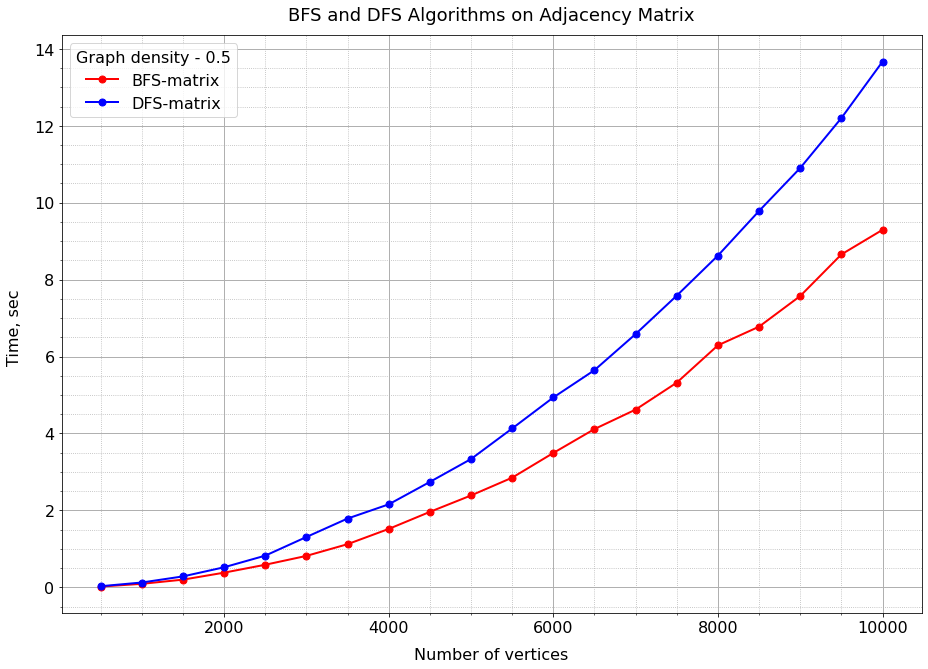

In [ ]:
    plt.figure(figsize=(13,9))   
    plt.rc('legend', fontsize=16)
    #plt.rc('axis', fontsize=16)
    #plt.legend()
    
    #plt.plot(x, y_bfs_mat, 'o-r', label='BFS-matrix', lw=2, ms=7)
    #plt.plot(x, y_dfs_mat, 'o-b', label='DFS-matrix', lw=2, ms=7)
    ax = plt.gca()
    #ax.axhline(y=0, color='k')
    #plt.plot([], [], ' ', label="Graph density - 0.2")
    bfs = ax.plot(x, y_bfs_mat, 'o-r', label='BFS-matrix', lw=2, ms=7)
    dfs = ax.plot(x, y_dfs_mat, 'o-b', label='DFS-matrix', lw=2, ms=7)
    #ax.set_xticks(x)
    #plt.plot(x, y_bfs_list, 'm', label='old')
    #plt.plot(x, y_dfs_list, 'g', label='2')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    
    #plt.plot([], [], ' ', label="dgfgfjgkhj")
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', labelsize=16) 
    plt.ylabel('Time, sec ', fontsize=16, labelpad =12)
    plt.xlabel('Number of vertices',fontsize=16, labelpad =12)
    plt.grid(True)
    plt.grid(which='major', linewidth = 1)
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()
    plt.title('BFS and DFS Algorithms on Adjacency Matrix', fontsize=18, pad=15)    
    plt.legend(title ="Graph density - 0.5",title_fontsize=16)
    
    plt.show()

In [ ]:
#BFS DFS MATRIX 0.8
x = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
y_bfs_mat = [0.021836519241333008, 0.09922080039978028, 0.20882251262664794, 0.37240192890167234, 0.5970951318740845, 0.9777874708175659, 1.3261928796768188, 1.5924057960510254, 2.04683039188385, 2.438714098930359, 3.0433268785476684, 3.4943995475769043, 4.250969743728637, 4.8053909063339235, 5.4852803468704225, 6.413454055786133, 6.999242520332336, 7.951410436630249, 8.733726596832275, 9.875566840171814]
y_dfs_mat = [0.031599235534667966, 0.12984871864318848, 0.31394214630126954, 0.5710867881774903, 0.8661625623703003, 1.2343563318252564, 1.6704074144363403, 2.2614906072616576, 2.853231596946716, 3.575808572769165, 4.27979097366333, 5.23329348564148, 5.9947898387908936, 6.952559208869934, 8.019455242156983, 9.001247668266297, 10.277248358726501, 11.493205881118774, 12.755857515335084, 14.131663823127747]

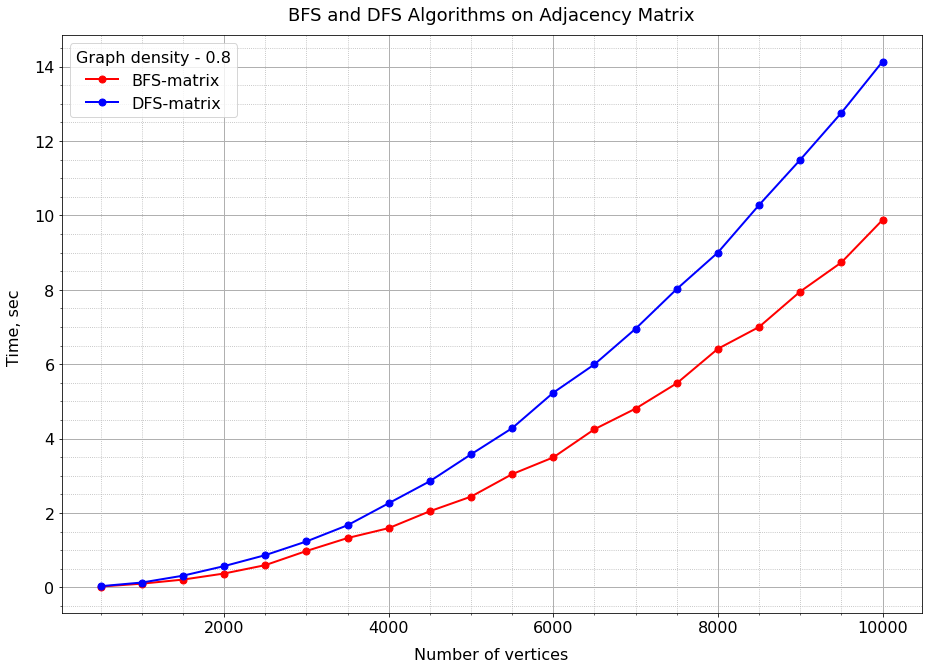

In [ ]:
    plt.figure(figsize=(13,9))   
    plt.rc('legend', fontsize=16)
    #plt.rc('axis', fontsize=16)
    #plt.legend()
    
    #plt.plot(x, y_bfs_mat, 'o-r', label='BFS-matrix', lw=2, ms=7)
    #plt.plot(x, y_dfs_mat, 'o-b', label='DFS-matrix', lw=2, ms=7)
    ax = plt.gca()
    #ax.axhline(y=0, color='k')
    #plt.plot([], [], ' ', label="Graph density - 0.2")
    bfs = ax.plot(x, y_bfs_mat, 'o-r', label='BFS-matrix', lw=2, ms=7)
    dfs = ax.plot(x, y_dfs_mat, 'o-b', label='DFS-matrix', lw=2, ms=7)
    #ax.set_xticks(x)
    #plt.plot(x, y_bfs_list, 'm', label='old')
    #plt.plot(x, y_dfs_list, 'g', label='2')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    
    #plt.plot([], [], ' ', label="dgfgfjgkhj")
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', labelsize=16) 
    plt.ylabel('Time, sec ', fontsize=16, labelpad =12)
    plt.xlabel('Number of vertices',fontsize=16, labelpad =12)
    plt.grid(True)
    plt.grid(which='major', linewidth = 1)
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()
    plt.title('BFS and DFS Algorithms on Adjacency Matrix', fontsize=18, pad=15)    
    plt.legend(title ="Graph density - 0.8",title_fontsize=16)
    
    plt.show()

In [ ]:
#BFS n' DFS on matrix 

x = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
y_bfs_mat_1 = [0.018416643142700195, 0.0770716667175293, 0.2016394853591919, 0.3387021541595459, 0.5150734186172485, 0.8524894475936889, 1.1775267839431762, 1.3721324920654296, 1.7477533340454101, 2.084705853462219, 2.6370208740234373, 2.8816776990890505, 3.531234073638916, 4.075443744659424, 4.712262535095215, 5.636057877540589, 6.064952445030213, 6.891795015335083, 7.730733060836792, 8.729131388664246]
y_dfs_mat_1 = [0.02706565856933594, 0.11237282752990722, 0.2596211671829224, 0.4770265817642212, 0.7423297882080078, 1.0458834648132325, 1.439961886405945, 1.9468361377716064, 2.4735923528671266, 3.0302180528640745, 3.6607404947280884, 4.4480236053466795, 5.1203752040863035, 5.968657350540161, 6.844720315933228, 7.731664609909058, 8.817921161651611, 9.823376560211182, 10.999064540863037, 12.47685203552246]

y_bfs_mat_2 =      [0.02032592296600342, 0.09130253791809081, 0.19994258880615234, 0.38162870407104493, 0.5871518135070801, 0.8174757719039917, 1.1220612287521363, 1.5182743549346924, 1.9617547035217284, 2.3882932662963867, 2.850713539123535, 3.4931353330612183, 4.114632678031922, 4.620651221275329, 5.321321272850037, 6.291403126716614, 6.776553082466125, 7.573153614997864, 8.654442429542542, 9.294068217277527]
y_dfs_mat_2 =      [0.029096651077270507, 0.12553396224975585, 0.28426907062530515, 0.5217231750488281, 0.8240310907363891, 1.3088424682617188, 1.788293218612671, 2.157255530357361, 2.740185594558716, 3.3356217622756956, 4.129457592964172, 4.936090445518493, 5.645902514457703, 6.584408330917358, 7.583381319046021, 8.62392237186432, 9.784214091300964, 10.901526546478271, 12.199066281318665, 13.66645543575287]
y_bfs_mat_3 = [0.021836519241333008, 0.09922080039978028, 0.20882251262664794, 0.37240192890167234, 0.5970951318740845, 0.9777874708175659, 1.3261928796768188, 1.5924057960510254, 2.04683039188385, 2.438714098930359, 3.0433268785476684, 3.4943995475769043, 4.250969743728637, 4.8053909063339235, 5.4852803468704225, 6.413454055786133, 6.999242520332336, 7.951410436630249, 8.733726596832275, 9.875566840171814]
y_dfs_mat_3 = [0.031599235534667966, 0.12984871864318848, 0.31394214630126954, 0.5710867881774903, 0.8661625623703003, 1.2343563318252564, 1.6704074144363403, 2.2614906072616576, 2.853231596946716, 3.575808572769165, 4.27979097366333, 5.23329348564148, 5.9947898387908936, 6.952559208869934, 8.019455242156983, 9.001247668266297, 10.277248358726501, 11.493205881118774, 12.755857515335084, 14.131663823127747]

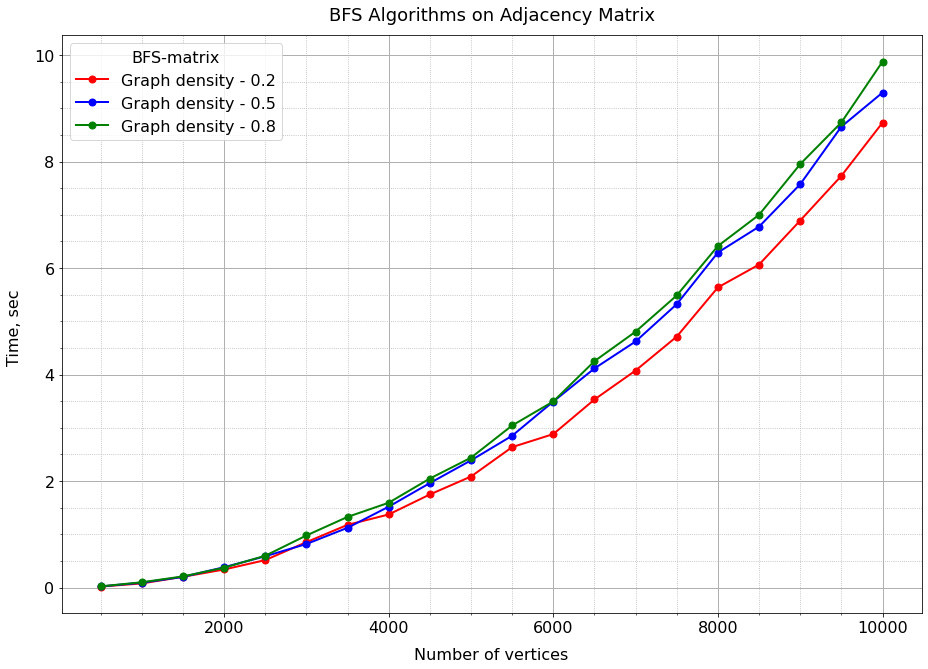

In [ ]:
    plt.figure(figsize=(13,9))   
    plt.rc('legend', fontsize=16)
    #plt.rc('axis', fontsize=16)
    #plt.legend()
    
    #plt.plot(x, y_bfs_mat, 'o-r', label='BFS-matrix', lw=2, ms=7)
    #plt.plot(x, y_dfs_mat, 'o-b', label='DFS-matrix', lw=2, ms=7)
    ax = plt.gca()
    #ax.axhline(y=0, color='k')
    #plt.plot([], [], ' ', label="Graph density - 0.2")
    bfs = ax.plot(x, y_bfs_mat_1, 'o-r', label='Graph density - 0.2', lw=2, ms=7)
    dfs = ax.plot(x, y_bfs_mat_2, 'o-b', label='Graph density - 0.5', lw=2, ms=7)
    dfs_1 = ax.plot(x, y_bfs_mat_3, 'o-g', label='Graph density - 0.8', lw=2, ms=7)
    #ax.set_xticks(x)
    #plt.plot(x, y_bfs_list, 'm', label='old')
    #plt.plot(x, y_dfs_list, 'g', label='2')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    
    #plt.plot([], [], ' ', label="dgfgfjgkhj")
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', labelsize=16) 
    plt.ylabel('Time, sec ', fontsize=16, labelpad =12)
    plt.xlabel('Number of vertices',fontsize=16, labelpad =12)
    plt.grid(True)
    plt.grid(which='major', linewidth = 1)
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()
    plt.title('BFS Algorithms on Adjacency Matrix', fontsize=18, pad=15)    
    plt.legend(title ="BFS-matrix",title_fontsize=16)
    
    plt.show()

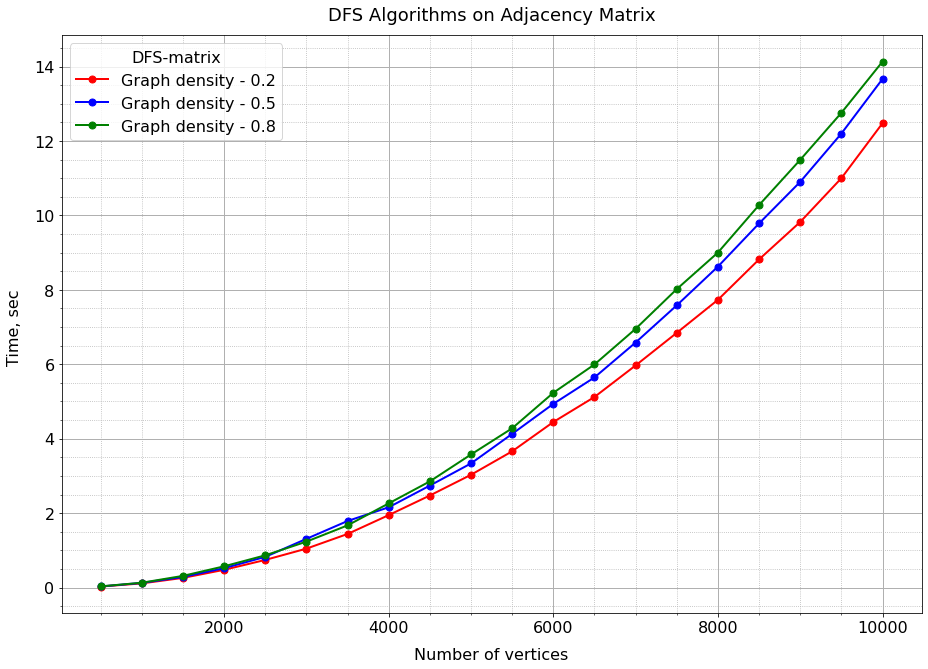

In [ ]:
    plt.figure(figsize=(13,9))   
    plt.rc('legend', fontsize=16)
    #plt.rc('axis', fontsize=16)
    #plt.legend()
    
    #plt.plot(x, y_bfs_mat, 'o-r', label='BFS-matrix', lw=2, ms=7)
    #plt.plot(x, y_dfs_mat, 'o-b', label='DFS-matrix', lw=2, ms=7)
    ax = plt.gca()
    #ax.axhline(y=0, color='k')
    #plt.plot([], [], ' ', label="Graph density - 0.2")
    bfs = ax.plot(x, y_dfs_mat_1, 'o-r', label='Graph density - 0.2', lw=2, ms=7)
    dfs = ax.plot(x, y_dfs_mat_2, 'o-b', label='Graph density - 0.5', lw=2, ms=7)
    dfs_1 = ax.plot(x, y_dfs_mat_3, 'o-g', label='Graph density - 0.8', lw=2, ms=7)
    #ax.set_xticks(x)
    #plt.plot(x, y_bfs_list, 'm', label='old')
    #plt.plot(x, y_dfs_list, 'g', label='2')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    
    #plt.plot([], [], ' ', label="dgfgfjgkhj")
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', labelsize=16) 
    plt.ylabel('Time, sec ', fontsize=16, labelpad =12)
    plt.xlabel('Number of vertices',fontsize=16, labelpad =12)
    plt.grid(True)
    plt.grid(which='major', linewidth = 1)
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()
    plt.title('DFS Algorithms on Adjacency Matrix', fontsize=18, pad=15)    
    plt.legend(title ="DFS-matrix",title_fontsize=16)
    
    plt.show()

In [ ]:
# BFS n DFS list 0.2   #####################
x = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
y_bfs_mat = [0.002026081085205078, 0.008404183387756347, 0.018626832962036134, 0.033541631698608396, 0.05674166679382324, 0.06783301830291748, 0.09267549514770508, 0.13452937602996826, 0.16976137161254884, 0.2372054100036621, 0.26899850368499756, 0.37043190002441406, 0.44058613777160643, 0.45798487663269044, 0.6124245643615722, 0.6480652809143066, 0.780250072479248, 0.8728867292404174, 1.0117106199264527, 1.0489521265029906]
y_dfs_mat = [0.002706456184387207, 0.016922736167907716, 0.023041200637817384, 0.04007687568664551, 0.06891822814941406, 0.12122435569763183, 0.16830177307128907, 0.19720966815948487, 0.24100818634033203, 0.2962639331817627, 0.3667054414749146, 0.4387259006500244, 0.521628451347351, 0.6484259843826294, 0.7321350336074829, 0.9003974199295044, 0.9916822433471679, 1.1440708637237549, 1.3224795579910278, 1.508521604537964]

[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
[0.002026081085205078, 0.008404183387756347, 0.018626832962036134, 0.033541631698608396, 0.05674166679382324, 0.06783301830291748, 0.09267549514770508, 0.13452937602996826, 0.16976137161254884, 0.2372054100036621, 0.26899850368499756, 0.37043190002441406, 0.44058613777160643, 0.45798487663269044, 0.6124245643615722, 0.6480652809143066, 0.780250072479248, 0.8728867292404174, 1.0117106199264527, 1.0489521265029906]
[0.002706456184387207, 0.016922736167907716, 0.023041200637817384, 0.04007687568664551, 0.06891822814941406, 0.12122435569763183, 0.16830177307128907, 0.19720966815948487, 0.24100818634033203, 0.2962639331817627, 0.3667054414749146, 0.4387259006500244, 0.521628451347351, 0.6484259843826294, 0.7321350336074829, 0.9003974199295044, 0.9916822433471679, 1.1440708637237549, 1.3224795579910278, 1.508521604537964]


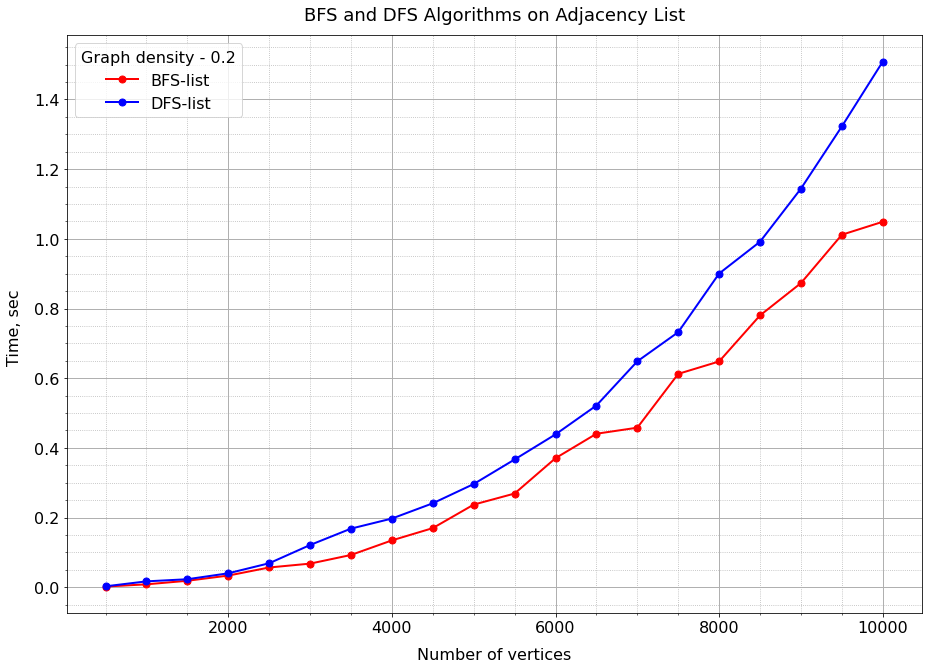

In [ ]:
    print(x)
    print(y_bfs_mat)
    print(y_dfs_mat)
   # print(y_bfs_list)
   # print(y_dfs_list)

    plt.figure(figsize=(13,9))   
    plt.rc('legend', fontsize=16)
    #plt.rc('axis', fontsize=16)
    #plt.legend()
    
    #plt.plot(x, y_bfs_mat, 'o-r', label='BFS-matrix', lw=2, ms=7)
    #plt.plot(x, y_dfs_mat, 'o-b', label='DFS-matrix', lw=2, ms=7)
    ax = plt.gca()
    #ax.axhline(y=0, color='k')
    #plt.plot([], [], ' ', label="Graph density - 0.2")
    bfs = ax.plot(x, y_bfs_mat, 'o-r', label='BFS-list', lw=2, ms=7)
    dfs = ax.plot(x, y_dfs_mat, 'o-b', label='DFS-list', lw=2, ms=7)
    #ax.set_xticks(x)
    #plt.plot(x, y_bfs_list, 'm', label='old')
    #plt.plot(x, y_dfs_list, 'g', label='2')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    
    #plt.plot([], [], ' ', label="dgfgfjgkhj")
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', labelsize=16) 
    plt.ylabel('Time, sec ', fontsize=16, labelpad =12)
    plt.xlabel('Number of vertices',fontsize=16, labelpad =12)
    plt.grid(True)
    plt.grid(which='major', linewidth = 1)
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()
    plt.title('BFS and DFS Algorithms on Adjacency List', fontsize=18, pad=15)    
    plt.legend(title ="Graph density - 0.2",title_fontsize=16)
    
    plt.show()

In [ ]:
# BFS N DFS LIST 0.5
x = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
y_bfs_mat = [0.004013872146606446, 0.01754605770111084, 0.03476204872131348, 0.0741544246673584, 0.11062190532684327, 0.1484513759613037, 0.2172983169555664, 0.31697041988372804, 0.4249842882156372, 0.5392461776733398, 0.7181067705154419, 0.9662156105041504, 1.0448216676712037, 1.2751270294189454, 1.4536214828491212, 1.7888902425765991, 2.110202431678772, 2.36687490940094, 2.5795632123947145, 2.80931077003479]
y_dfs_mat = [0.005881357192993164, 0.02299544811248779, 0.05105278491973877, 0.09192378520965576, 0.15155332088470458, 0.2683652639389038, 0.37920753955841063, 0.44198553562164306, 0.5686504602432251, 0.7246760129928589, 0.8989958047866822, 1.0926602125167846, 1.3760343313217163, 1.5760440111160279, 1.9026319980621338, 2.189909553527832, 2.447859859466553, 2.895793318748474, 3.3348448038101197, 3.850054717063904]

[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
[0.004013872146606446, 0.01754605770111084, 0.03476204872131348, 0.0741544246673584, 0.11062190532684327, 0.1484513759613037, 0.2172983169555664, 0.31697041988372804, 0.4249842882156372, 0.5392461776733398, 0.7181067705154419, 0.9662156105041504, 1.0448216676712037, 1.2751270294189454, 1.4536214828491212, 1.7888902425765991, 2.110202431678772, 2.36687490940094, 2.5795632123947145, 2.80931077003479]
[0.005881357192993164, 0.02299544811248779, 0.05105278491973877, 0.09192378520965576, 0.15155332088470458, 0.2683652639389038, 0.37920753955841063, 0.44198553562164306, 0.5686504602432251, 0.7246760129928589, 0.8989958047866822, 1.0926602125167846, 1.3760343313217163, 1.5760440111160279, 1.9026319980621338, 2.189909553527832, 2.447859859466553, 2.895793318748474, 3.3348448038101197, 3.850054717063904]


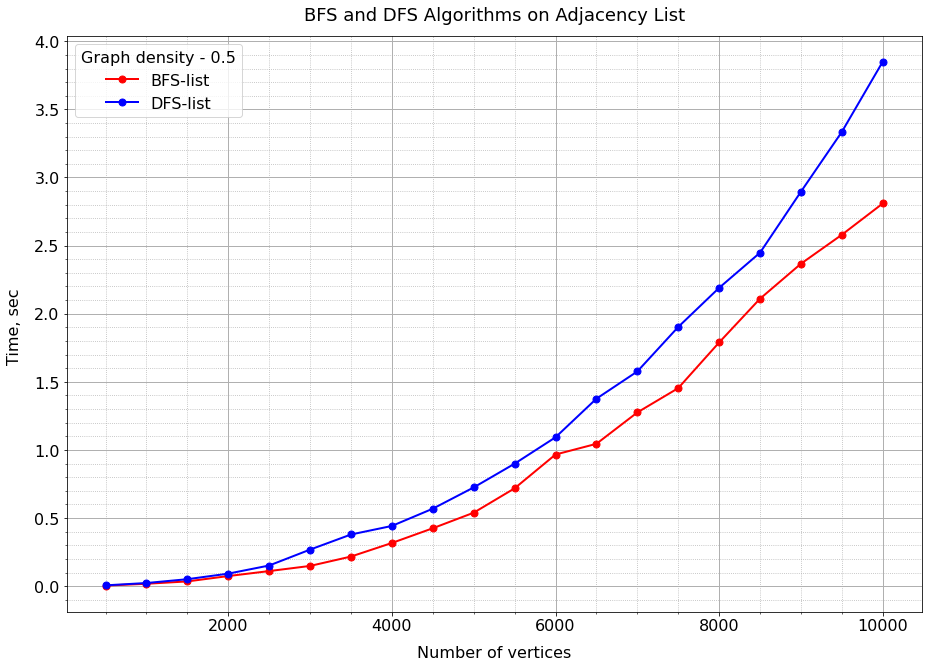

In [ ]:
    print(x)
    print(y_bfs_mat)
    print(y_dfs_mat)
   # print(y_bfs_list)
   # print(y_dfs_list)

    plt.figure(figsize=(13,9))   
    plt.rc('legend', fontsize=16)
    #plt.rc('axis', fontsize=16)
    #plt.legend()
    
    #plt.plot(x, y_bfs_mat, 'o-r', label='BFS-matrix', lw=2, ms=7)
    #plt.plot(x, y_dfs_mat, 'o-b', label='DFS-matrix', lw=2, ms=7)
    ax = plt.gca()
    #ax.axhline(y=0, color='k')
    #plt.plot([], [], ' ', label="Graph density - 0.2")
    bfs = ax.plot(x, y_bfs_mat, 'o-r', label='BFS-list', lw=2, ms=7)
    dfs = ax.plot(x, y_dfs_mat, 'o-b', label='DFS-list', lw=2, ms=7)
    #ax.set_xticks(x)
    #plt.plot(x, y_bfs_list, 'm', label='old')
    #plt.plot(x, y_dfs_list, 'g', label='2')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    
    #plt.plot([], [], ' ', label="dgfgfjgkhj")
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', labelsize=16) 
    plt.ylabel('Time, sec ', fontsize=16, labelpad =12)
    plt.xlabel('Number of vertices',fontsize=16, labelpad =12)
    plt.grid(True)
    plt.grid(which='major', linewidth = 1)
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()
    plt.title('BFS and DFS Algorithms on Adjacency List', fontsize=18, pad=15)    
    plt.legend(title ="Graph density - 0.5",title_fontsize=16)
    
    plt.show()

In [ ]:
#BFS N DFS LIST 0.8
x = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
y_bfs_mat = [0.006792616844177246, 0.028269195556640626, 0.05787858963012695, 0.1125652551651001, 0.20097177028656005, 0.3521277904510498, 0.4987258672714233, 0.5478741645812988, 0.739566969871521, 0.9487776756286621, 1.167712926864624, 1.1936367273330688, 1.710932445526123, 2.2180151462554933, 2.6444167613983156, 2.820571041107178, 2.992282819747925, 4.10037887096405, 4.381442236900329, 4.723303270339966]
y_dfs_mat = [0.009315752983093261, 0.03799560070037842, 0.10279979705810546, 0.1752089500427246, 0.2710660457611084, 0.38207545280456545, 0.5571506500244141, 0.8061803579330444, 1.005786657333374, 1.2912611722946168, 1.6039540767669678, 1.9927559852600099, 2.315752863883972, 2.839277410507202, 3.2434322357177736, 3.7574965715408326, 4.518551778793335, 5.168126273155212, 5.875080347061157, 6.81537230014801]

[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
[0.006792616844177246, 0.028269195556640626, 0.05787858963012695, 0.1125652551651001, 0.20097177028656005, 0.3521277904510498, 0.4987258672714233, 0.5478741645812988, 0.739566969871521, 0.9487776756286621, 1.167712926864624, 1.1936367273330688, 1.710932445526123, 2.2180151462554933, 2.6444167613983156, 2.820571041107178, 2.992282819747925, 4.10037887096405, 4.381442236900329, 4.723303270339966]
[0.009315752983093261, 0.03799560070037842, 0.10279979705810546, 0.1752089500427246, 0.2710660457611084, 0.38207545280456545, 0.5571506500244141, 0.8061803579330444, 1.005786657333374, 1.2912611722946168, 1.6039540767669678, 1.9927559852600099, 2.315752863883972, 2.839277410507202, 3.2434322357177736, 3.7574965715408326, 4.518551778793335, 5.168126273155212, 5.875080347061157, 6.81537230014801]


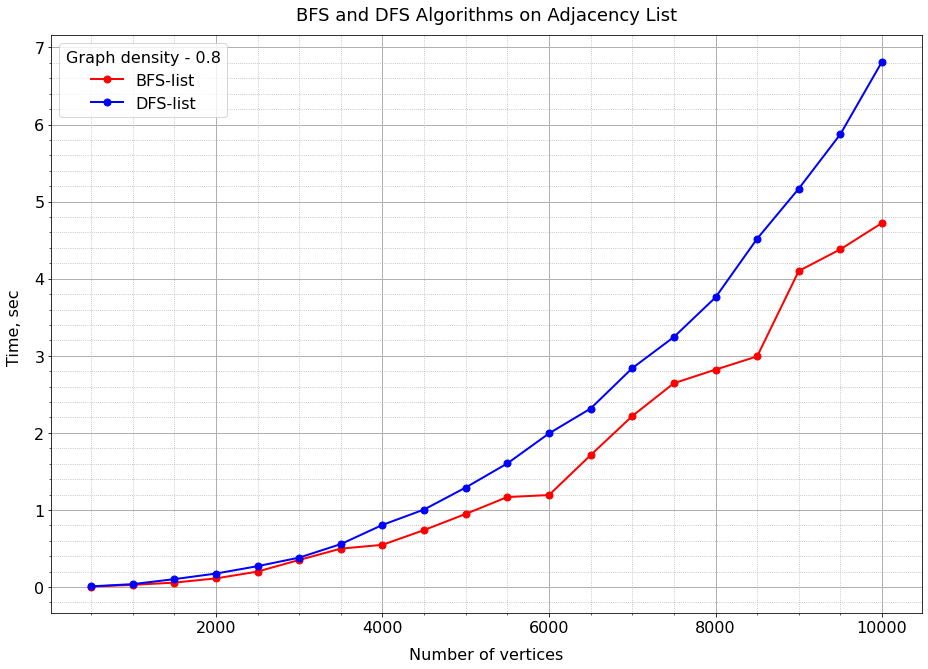

In [ ]:
    print(x)
    print(y_bfs_mat)
    print(y_dfs_mat)
   # print(y_bfs_list)
   # print(y_dfs_list)

    plt.figure(figsize=(13,9))   
    plt.rc('legend', fontsize=16)
    #plt.rc('axis', fontsize=16)
    #plt.legend()
    
    #plt.plot(x, y_bfs_mat, 'o-r', label='BFS-matrix', lw=2, ms=7)
    #plt.plot(x, y_dfs_mat, 'o-b', label='DFS-matrix', lw=2, ms=7)
    ax = plt.gca()
    #ax.axhline(y=0, color='k')
    #plt.plot([], [], ' ', label="Graph density - 0.2")
    bfs = ax.plot(x, y_bfs_mat, 'o-r', label='BFS-list', lw=2, ms=7)
    dfs = ax.plot(x, y_dfs_mat, 'o-b', label='DFS-list', lw=2, ms=7)
    #ax.set_xticks(x)
    #plt.plot(x, y_bfs_list, 'm', label='old')
    #plt.plot(x, y_dfs_list, 'g', label='2')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    
    #plt.plot([], [], ' ', label="dgfgfjgkhj")
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', labelsize=16) 
    plt.ylabel('Time, sec ', fontsize=16, labelpad =12)
    plt.xlabel('Number of vertices',fontsize=16, labelpad =12)
    plt.grid(True)
    plt.grid(which='major', linewidth = 1)
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()
    plt.title('BFS and DFS Algorithms on Adjacency List', fontsize=18, pad=15)    
    plt.legend(title ="Graph density - 0.8",title_fontsize=16)
    
    plt.show()

In [ ]:
# BFS n DFS list 0.2   #####################
x = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
y_bfs_mat_1 = [0.002026081085205078, 0.008404183387756347, 0.018626832962036134, 0.033541631698608396, 0.05674166679382324, 0.06783301830291748, 0.09267549514770508, 0.13452937602996826, 0.16976137161254884, 0.2372054100036621, 0.26899850368499756, 0.37043190002441406, 0.44058613777160643, 0.45798487663269044, 0.6124245643615722, 0.6480652809143066, 0.780250072479248, 0.8728867292404174, 1.0117106199264527, 1.0489521265029906]
y_dfs_mat_1 = [0.002706456184387207, 0.016922736167907716, 0.023041200637817384, 0.04007687568664551, 0.06891822814941406, 0.12122435569763183, 0.16830177307128907, 0.19720966815948487, 0.24100818634033203, 0.2962639331817627, 0.3667054414749146, 0.4387259006500244, 0.521628451347351, 0.6484259843826294, 0.7321350336074829, 0.9003974199295044, 0.9916822433471679, 1.1440708637237549, 1.3224795579910278, 1.508521604537964]

# BFS N DFS LIST 0.5
x = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
y_bfs_mat_2 = [0.004013872146606446, 0.01754605770111084, 0.03476204872131348, 0.0741544246673584, 0.11062190532684327, 0.1484513759613037, 0.2172983169555664, 0.31697041988372804, 0.4249842882156372, 0.5392461776733398, 0.7181067705154419, 0.9662156105041504, 1.0448216676712037, 1.2751270294189454, 1.4536214828491212, 1.7888902425765991, 2.110202431678772, 2.36687490940094, 2.5795632123947145, 2.80931077003479]
y_dfs_mat_2 = [0.005881357192993164, 0.02299544811248779, 0.05105278491973877, 0.09192378520965576, 0.15155332088470458, 0.2683652639389038, 0.37920753955841063, 0.44198553562164306, 0.5686504602432251, 0.7246760129928589, 0.8989958047866822, 1.0926602125167846, 1.3760343313217163, 1.5760440111160279, 1.9026319980621338, 2.189909553527832, 2.447859859466553, 2.895793318748474, 3.3348448038101197, 3.850054717063904]

#BFS N DFS LIST 0.8
x = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
y_bfs_mat_3 = [0.006792616844177246, 0.028269195556640626, 0.05787858963012695, 0.1125652551651001, 0.20097177028656005, 0.3521277904510498, 0.4987258672714233, 0.5478741645812988, 0.739566969871521, 0.9487776756286621, 1.167712926864624, 1.1936367273330688, 1.710932445526123, 2.2180151462554933, 2.6444167613983156, 2.820571041107178, 2.992282819747925, 4.10037887096405, 4.381442236900329, 4.723303270339966]
y_dfs_mat_3 = [0.009315752983093261, 0.03799560070037842, 0.10279979705810546, 0.1752089500427246, 0.2710660457611084, 0.38207545280456545, 0.5571506500244141, 0.8061803579330444, 1.005786657333374, 1.2912611722946168, 1.6039540767669678, 1.9927559852600099, 2.315752863883972, 2.839277410507202, 3.2434322357177736, 3.7574965715408326, 4.518551778793335, 5.168126273155212, 5.875080347061157, 6.81537230014801]


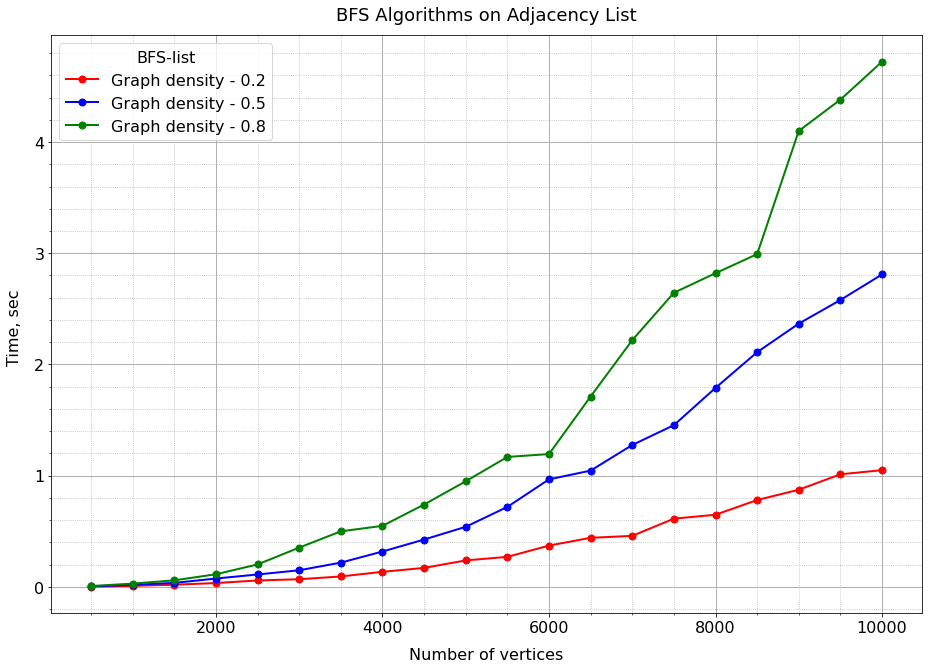

In [ ]:
    plt.figure(figsize=(13,9))   
    plt.rc('legend', fontsize=16)
    #plt.rc('axis', fontsize=16)
    #plt.legend()
    
    #plt.plot(x, y_bfs_mat, 'o-r', label='BFS-matrix', lw=2, ms=7)
    #plt.plot(x, y_dfs_mat, 'o-b', label='DFS-matrix', lw=2, ms=7)
    ax = plt.gca()
    #ax.axhline(y=0, color='k')
    #plt.plot([], [], ' ', label="Graph density - 0.2")
    bfs = ax.plot(x, y_bfs_mat_1, 'o-r', label='Graph density - 0.2', lw=2, ms=7)
    dfs = ax.plot(x, y_bfs_mat_2, 'o-b', label='Graph density - 0.5', lw=2, ms=7)
    dfs_1 = ax.plot(x, y_bfs_mat_3, 'o-g', label='Graph density - 0.8', lw=2, ms=7)
    #ax.set_xticks(x)
    #plt.plot(x, y_bfs_list, 'm', label='old')
    #plt.plot(x, y_dfs_list, 'g', label='2')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    
    #plt.plot([], [], ' ', label="dgfgfjgkhj")
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', labelsize=16) 
    plt.ylabel('Time, sec ', fontsize=16, labelpad =12)
    plt.xlabel('Number of vertices',fontsize=16, labelpad =12)
    plt.grid(True)
    plt.grid(which='major', linewidth = 1)
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()
    plt.title('BFS Algorithms on Adjacency List', fontsize=18, pad=15)    
    plt.legend(title ="BFS-list",title_fontsize=16)
    
    plt.show()

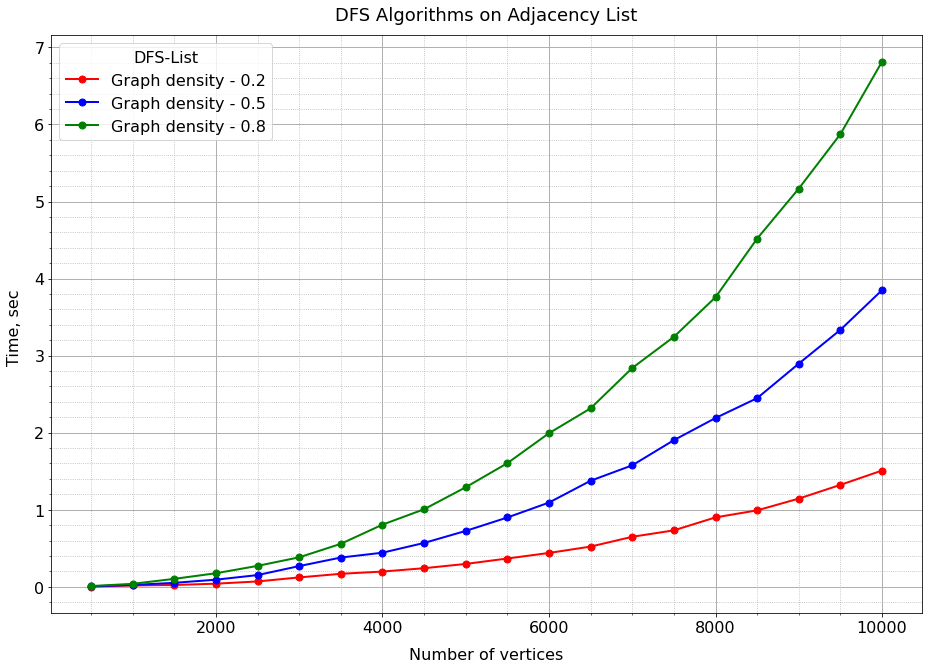

In [ ]:
    plt.figure(figsize=(13,9))   
    plt.rc('legend', fontsize=16)
    #plt.rc('axis', fontsize=16)
    #plt.legend()
    
    #plt.plot(x, y_bfs_mat, 'o-r', label='BFS-matrix', lw=2, ms=7)
    #plt.plot(x, y_dfs_mat, 'o-b', label='DFS-matrix', lw=2, ms=7)
    ax = plt.gca()
    #ax.axhline(y=0, color='k')
    #plt.plot([], [], ' ', label="Graph density - 0.2")
    bfs = ax.plot(x, y_dfs_mat_1, 'o-r', label='Graph density - 0.2', lw=2, ms=7)
    dfs = ax.plot(x, y_dfs_mat_2, 'o-b', label='Graph density - 0.5', lw=2, ms=7)
    dfs_1 = ax.plot(x, y_dfs_mat_3, 'o-g', label='Graph density - 0.8', lw=2, ms=7)
    #ax.set_xticks(x)
    #plt.plot(x, y_bfs_list, 'm', label='old')
    #plt.plot(x, y_dfs_list, 'g', label='2')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    
    #plt.plot([], [], ' ', label="dgfgfjgkhj")
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', labelsize=16) 
    plt.ylabel('Time, sec ', fontsize=16, labelpad =12)
    plt.xlabel('Number of vertices',fontsize=16, labelpad =12)
    plt.grid(True)
    plt.grid(which='major', linewidth = 1)
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()
    plt.title('DFS Algorithms on Adjacency List', fontsize=18, pad=15)    
    plt.legend(title ="DFS-List",title_fontsize=16)
    
    plt.show()

Input count of iter: 
20
iter -  1
iter -  2
iter -  3
iter -  4
iter -  5
iter -  6
iter -  7
iter -  8
iter -  9
iter -  10
iter -  11
iter -  12
iter -  13
iter -  14
iter -  15
iter -  16
iter -  17
iter -  18
iter -  19
iter -  20
[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
[0.0278627872467041, 0.10255608558654786, 0.20456464290618898, 0.4188107490539551, 0.6039360761642456, 0.8556675910949707, 1.271588182449341, 1.6536243438720704, 2.189164400100708, 2.4548553228378296, 3.141081762313843, 3.748802423477173, 4.282428455352783, 5.078510403633118, 5.556423830986023, 6.958289766311646, 7.144118046760559, 7.973944568634034, 8.731222534179688, 9.841746950149536]
[0.029729795455932618, 0.12731809616088868, 0.28876590728759766, 0.5417678117752075, 0.8711857557296753, 1.2104758024215698, 1.7032216548919679, 2.219998502731323, 2.7211747407913207, 3.434156632423401, 4.404138970375061, 4.9818933486938475, 5.89238629

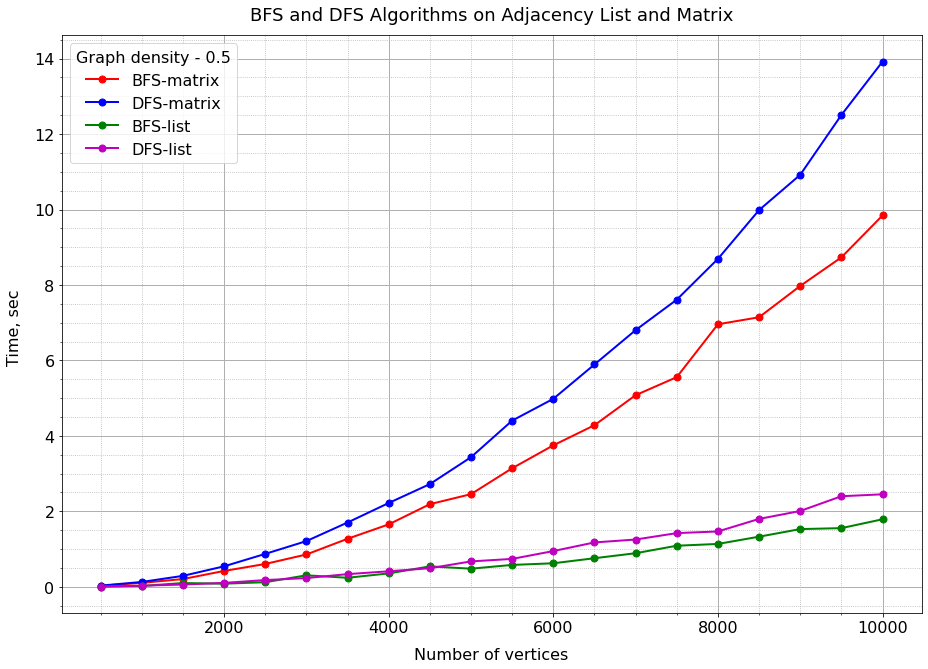

In [ ]:
""" Main class """
import time
import matplotlib.pyplot as plt
import random


def main():

    print('Input count of iter: ')
    count = int(input())
    count_vertex = 500
    interval = 500
    x = [i for i in range(count_vertex, count*count_vertex+1, count_vertex)]
    #print(x)
    y_bfs_mat = [0 for i in range(count)]

    y_dfs_mat = [0 for i in range(count)]

    y_bfs_list = [0 for i in range(count)]

    y_dfs_list = [0 for i in range(count)]
    count_graph = 10

    for i in range(count):
        count_time_bfs_mat = 0
        count_time_dfs_mat = 0
        count_time_bfs_list = 0
        count_time_dfs_list = 0
        print('iter - ', i+1)
        for j in range(count_graph):
            #print('count_vertex =' ,count_vertex)
            rand_top = random.randint(0, count_vertex-1)
            #print('rand_top = ', end=' ')
            #print(rand_top)
            graph_mat = AdjacencyMatrix(count_vertex, 0.5)#AdjacencyMatrix(count_vertex, 0.5)
            graph_list = AdjacencyList(create=False)#AdjacencyList()
            graph_list.conversion_from_matrix_to_list(graph_mat.matrix)
            #print(graph_mat)
            #print(graph_list)
            start_time_bfs_mat = time.time()
            tree_bfs_mat = bfs_for_matrix(graph_mat.matrix, rand_top)
            end_time_bfs_mat = time.time() - start_time_bfs_mat
            
            start_time_dfs_mat = time.time()
            tree_dfs_mat = dfs_for_matrix(graph_mat.matrix, rand_top)
            end_time_dfs_mat = time.time() - start_time_dfs_mat

            start_time_bfs_list = time.time()
            tree_list_bfs = bfs_for_list(graph_list.list_, rand_top)
            end_time_bfs_list = time.time() - start_time_bfs_list

            start_time_dfs_list = time.time()
            tree_list_dfs = dfs_for_list(graph_list.list_, rand_top)
            end_time_dfs_list = time.time() - start_time_dfs_list

            count_time_bfs_mat += end_time_bfs_mat
            count_time_dfs_mat += end_time_dfs_mat
            count_time_bfs_list += end_time_bfs_list
            count_time_dfs_list += end_time_dfs_list
        count_vertex += interval
        y_bfs_mat[i] = count_time_bfs_mat/count_graph
        y_dfs_mat[i] = count_time_dfs_mat/count_graph
        y_bfs_list[i] = count_time_bfs_list/count_graph
        y_dfs_list[i] = count_time_dfs_list/count_graph

    print(x)
    print(y_bfs_mat)
    print(y_dfs_mat)
    print(y_bfs_list)
    print(y_dfs_list)

    plt.figure(figsize=(13,9))   
    plt.rc('legend', fontsize=16)
    #plt.rc('axis', fontsize=16)
    #plt.legend()
    
    #plt.plot(x, y_bfs_mat, 'o-r', label='BFS-matrix', lw=2, ms=7)
    #plt.plot(x, y_dfs_mat, 'o-b', label='DFS-matrix', lw=2, ms=7)
    ax = plt.gca()
    #ax.axhline(y=0, color='k')
    #plt.plot([], [], ' ', label="Graph density - 0.2")
    bfs = ax.plot(x, y_bfs_mat, 'o-r', label='BFS-matrix', lw=2, ms=7)
    dfs = ax.plot(x, y_dfs_mat, 'o-b', label='DFS-matrix', lw=2, ms=7)
    bfs_l = ax.plot(x, y_bfs_list, 'o-g', label='BFS-list', lw=2, ms=7)
    dfs_l = ax.plot(x, y_dfs_list, 'o-m', label='DFS-list', lw=2, ms=7)
    #ax.set_xticks(x)
    #plt.plot(x, y_bfs_list, 'm', label='old')
    #plt.plot(x, y_dfs_list, 'g', label='2')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    
    #plt.plot([], [], ' ', label="dgfgfjgkhj")
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', labelsize=16) 
    plt.ylabel('Time, sec ', fontsize=16, labelpad =12)
    plt.xlabel('Number of vertices',fontsize=16, labelpad =12)
    plt.grid(True)
    plt.grid(which='major', linewidth = 1)
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()
    plt.title('BFS and DFS Algorithms on Adjacency List and Matrix', fontsize=18, pad=15)    
    plt.legend(title ="Graph density - 0.5",title_fontsize=16)
    
    plt.show()



if __name__ == "__main__":
    main()



In [ ]:
# bfs dfs list mat 0.5

[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
[0.0278627872467041, 0.10255608558654786, 0.20456464290618898, 0.4188107490539551, 0.6039360761642456, 0.8556675910949707, 1.271588182449341, 1.6536243438720704, 2.189164400100708, 2.4548553228378296, 3.141081762313843, 3.748802423477173, 4.282428455352783, 5.078510403633118, 5.556423830986023, 6.958289766311646, 7.144118046760559, 7.973944568634034, 8.731222534179688, 9.841746950149536]
[0.029729795455932618, 0.12731809616088868, 0.28876590728759766, 0.5417678117752075, 0.8711857557296753, 1.2104758024215698, 1.7032216548919679, 2.219998502731323, 2.7211747407913207, 3.434156632423401, 4.404138970375061, 4.9818933486938475, 5.8923862934112545, 6.802733969688416, 7.610171604156494, 8.69109148979187, 9.984506607055664, 10.919475674629211, 12.504001641273499, 13.91987066268921]
[0.005263328552246094, 0.021167063713073732, 0.0983163833618164, 0.08117129802703857, 0.12055306434631348, 0.30326712131500244, 0.23806407451629638, 0.3539976358413696, 0.5398887872695923, 0.47885589599609374, 0.5788567543029786, 0.6223024606704712, 0.7563263654708863, 0.888799786567688, 1.0875061988830566, 1.1348357677459717, 1.32712984085083, 1.528346848487854, 1.5539064168930055, 1.788530445098877]
[0.006351184844970703, 0.0277662992477417, 0.05871596336364746, 0.10250344276428222, 0.17671363353729247, 0.2303230047225952, 0.33462369441986084, 0.4099236011505127, 0.49137580394744873, 0.6719455718994141, 0.7382871866226196, 0.9459825754165649, 1.1747723340988159, 1.2519391298294067, 1.4219433307647704, 1.46573007106781, 1.7982426404953002, 2.008472371101379, 2.3992844820022583, 2.450522780418396]

CEnter centroid

Input count of iter: 
10
iter -  1
iter -  2
iter -  3
iter -  4
iter -  5
iter -  6
iter -  7
iter -  8
iter -  9
iter -  10
[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
[0.013488459587097167, 0.06391754150390624, 0.15018906593322753, 0.2682992696762085, 0.4262951135635376, 0.6204435348510742, 0.8824221611022949, 1.1264461040496827, 1.4459773778915406, 1.8548006057739257]
[0.6449066400527954, 4.511264848709106, 11.922646093368531, 15.792676830291748, 35.61297233104706, 56.835571146011354, 92.42331943511962, 123.67126522064208, 248.20892841815947, 283.5594080686569]
[0.001703500747680664, 0.005227422714233399, 0.011435198783874511, 0.0421506404876709, 0.01725947856903076, 0.023259878158569336, 0.053056192398071286, 0.06138789653778076, 0.04137818813323975, 0.0499403715133667]
[0.07980525493621826, 0.5734868288040161, 1.5214796543121338, 2.0086915731430053, 4.474901151657105, 7.285399580001831, 11.809182858467102, 15.971189188957215, 32.7506160736084, 36.7056521654129]


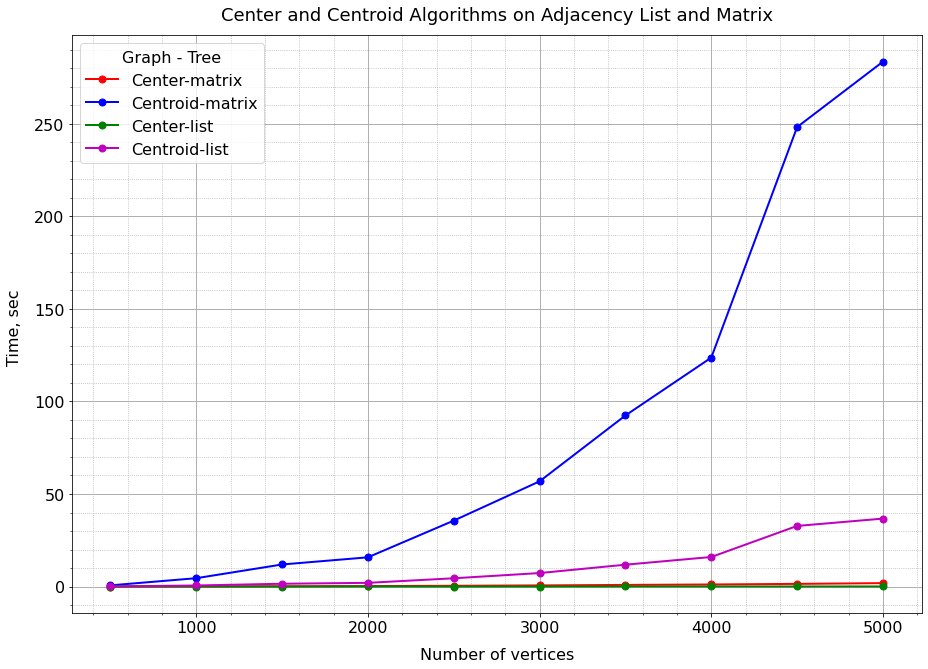

In [ ]:
""" Main class """
import time
import matplotlib.pyplot as plt
import random


def main():

    print('Input count of iter: ')
    count = int(input())
    count_vertex = 500
    interval = 500
    x = [i for i in range(count_vertex, count*count_vertex+1, count_vertex)]
    #print(x)
    y_bfs_mat = [0 for i in range(count)]

    y_dfs_mat = [0 for i in range(count)]

    y_bfs_list = [0 for i in range(count)]

    y_dfs_list = [0 for i in range(count)]
    count_graph = 10

    for i in range(count):
        count_time_bfs_mat = 0
        count_time_dfs_mat = 0
        count_time_bfs_list = 0
        count_time_dfs_list = 0
        print('iter - ', i+1)
        for j in range(count_graph):
            #print('count_vertex =' ,count_vertex)
            rand_top = random.randint(0, count_vertex-1)
            #print('rand_top = ', end=' ')
            #print(rand_top)
            graph = Tree(count_vertex)
               #AdjacencyMatrix(count_vertex, 0.5)#AdjacencyMatrix(count_vertex, 0.5)
            #graph_list = AdjacencyList(create=False)#AdjacencyList()
            #graph_list.conversion_from_matrix_to_list(graph_mat.matrix)
            #print(graph_mat)
            #print(graph_list)
            start_time_bfs_mat = time.time()
            tree_bfs_mat = center_for_matrix(graph.matrix_tree.matrix)
            end_time_bfs_mat = time.time() - start_time_bfs_mat
            
            start_time_dfs_mat = time.time()
            tree_dfs_mat = centroid_for_matrix(graph.matrix_tree.matrix)
            end_time_dfs_mat = time.time() - start_time_dfs_mat

            start_time_bfs_list = time.time()
            tree_list_bfs = center_for_list(graph.list_tree.list_)
            end_time_bfs_list = time.time() - start_time_bfs_list

            start_time_dfs_list = time.time()
            tree_list_dfs = centroid_for_list(graph.list_tree.list_)
            end_time_dfs_list = time.time() - start_time_dfs_list

            count_time_bfs_mat += end_time_bfs_mat
            count_time_dfs_mat += end_time_dfs_mat
            count_time_bfs_list += end_time_bfs_list
            count_time_dfs_list += end_time_dfs_list
        count_vertex += interval
        y_bfs_mat[i] = count_time_bfs_mat/count_graph
        y_dfs_mat[i] = count_time_dfs_mat/count_graph
        y_bfs_list[i] = count_time_bfs_list/count_graph
        y_dfs_list[i] = count_time_dfs_list/count_graph

    print(x)
    print(y_bfs_mat)
    print(y_dfs_mat)
    print(y_bfs_list)
    print(y_dfs_list)

    plt.figure(figsize=(13,9))   
    plt.rc('legend', fontsize=16)
    #plt.rc('axis', fontsize=16)
    #plt.legend()
    
    #plt.plot(x, y_bfs_mat, 'o-r', label='BFS-matrix', lw=2, ms=7)
    #plt.plot(x, y_dfs_mat, 'o-b', label='DFS-matrix', lw=2, ms=7)
    ax = plt.gca()
    #ax.axhline(y=0, color='k')
    #plt.plot([], [], ' ', label="Graph density - 0.2")
    bfs = ax.plot(x, y_bfs_mat, 'o-r', label='Center-matrix', lw=2, ms=7)
    dfs = ax.plot(x, y_dfs_mat, 'o-b', label='Centroid-matrix', lw=2, ms=7)
    bfs_l = ax.plot(x, y_bfs_list, 'o-g', label='Center-list', lw=2, ms=7)
    dfs_l = ax.plot(x, y_dfs_list, 'o-m', label='Centroid-list', lw=2, ms=7)
    #ax.set_xticks(x)
    #plt.plot(x, y_bfs_list, 'm', label='old')
    #plt.plot(x, y_dfs_list, 'g', label='2')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    
    #plt.plot([], [], ' ', label="dgfgfjgkhj")
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', labelsize=16) 
    plt.ylabel('Time, sec ', fontsize=16, labelpad =12)
    plt.xlabel('Number of vertices',fontsize=16, labelpad =12)
    plt.grid(True)
    plt.grid(which='major', linewidth = 1)
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()
    plt.title('Center and Centroid Algorithms on Adjacency List and Matrix', fontsize=18, pad=15)    
    plt.legend(title ="Graph - Tree",title_fontsize=16)
    
    plt.show()



if __name__ == "__main__":
    main()



In [ ]:
    print(x)
    print(y_bfs_mat)
    print(y_dfs_mat)
    print(y_bfs_list)
    print(y_dfs_list)

In [ ]:
# center centroid matrix list
x = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
y_bfs_mat = [0.013488459587097167, 0.06391754150390624, 0.15018906593322753, 0.2682992696762085, 0.4262951135635376, 0.6204435348510742, 0.8824221611022949, 1.1264461040496827, 1.4459773778915406, 1.8548006057739257]
y_dfs_mat = [0.6449066400527954, 4.511264848709106, 11.922646093368531, 15.792676830291748, 35.61297233104706, 56.835571146011354, 92.42331943511962, 123.67126522064208, 248.20892841815947, 283.5594080686569]
y_bfs_list = [0.001703500747680664, 0.005227422714233399, 0.011435198783874511, 0.0421506404876709, 0.01725947856903076, 0.023259878158569336, 0.053056192398071286, 0.06138789653778076, 0.04137818813323975, 0.0499403715133667]
y_dfs_list = [0.07980525493621826, 0.5734868288040161, 1.5214796543121338, 2.0086915731430053, 4.474901151657105, 7.285399580001831, 11.809182858467102, 15.971189188957215, 32.7506160736084, 36.7056521654129]


[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
[0.013488459587097167, 0.06391754150390624, 0.15018906593322753, 0.2682992696762085, 0.4262951135635376, 0.6204435348510742, 0.8824221611022949, 1.1264461040496827, 1.4459773778915406, 1.8548006057739257]
[0.6449066400527954, 4.511264848709106, 11.922646093368531, 15.792676830291748, 35.61297233104706, 56.835571146011354, 92.42331943511962, 123.67126522064208, 248.20892841815947, 283.5594080686569]
[0.001703500747680664, 0.005227422714233399, 0.011435198783874511, 0.0421506404876709, 0.01725947856903076, 0.023259878158569336, 0.053056192398071286, 0.06138789653778076, 0.04137818813323975, 0.0499403715133667]
[0.07980525493621826, 0.5734868288040161, 1.5214796543121338, 2.0086915731430053, 4.474901151657105, 7.285399580001831, 11.809182858467102, 15.971189188957215, 32.7506160736084, 36.7056521654129]


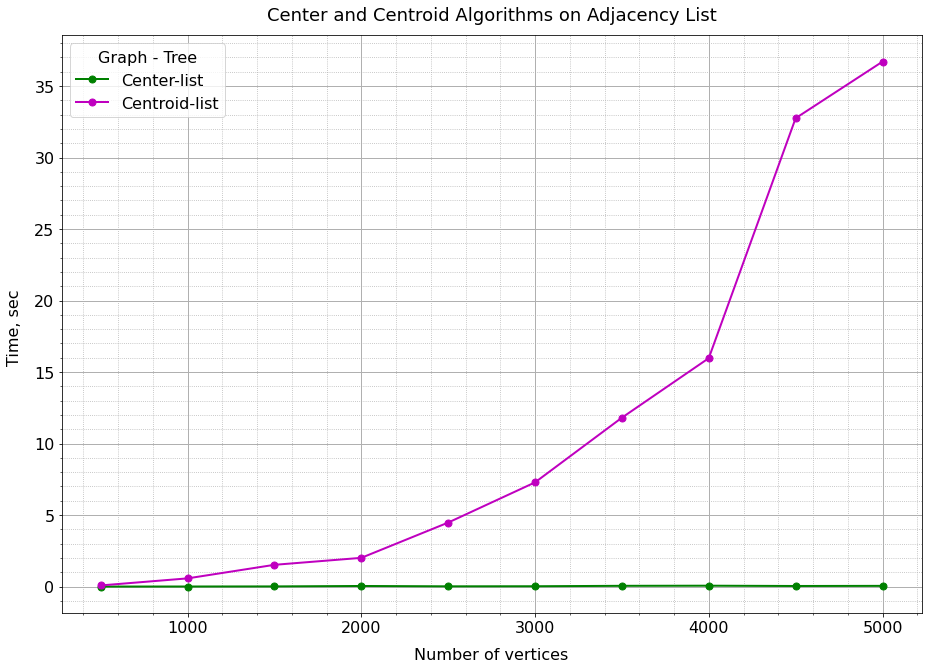

In [ ]:
    print(x)
    print(y_bfs_mat)
    print(y_dfs_mat)
    print(y_bfs_list)
    print(y_dfs_list)

    plt.figure(figsize=(13,9))   
    plt.rc('legend', fontsize=16)
    #plt.rc('axis', fontsize=16)
    #plt.legend()
    
    #plt.plot(x, y_bfs_mat, 'o-r', label='BFS-matrix', lw=2, ms=7)
    #plt.plot(x, y_dfs_mat, 'o-b', label='DFS-matrix', lw=2, ms=7)
    ax = plt.gca()
    #ax.axhline(y=0, color='k')
    #plt.plot([], [], ' ', label="Graph density - 0.2")
    #bfs = ax.plot(x, y_bfs_mat, 'o-r', label='Center-matrix', lw=2, ms=7)
    #dfs = ax.plot(x, y_dfs_mat, 'o-b', label='Centroid-matrix', lw=2, ms=7)
    bfs_l = ax.plot(x, y_bfs_list, 'o-g', label='Center-list', lw=2, ms=7)
    dfs_l = ax.plot(x, y_dfs_list, 'o-m', label='Centroid-list', lw=2, ms=7)
    #ax.set_xticks(x)
    #plt.plot(x, y_bfs_list, 'm', label='old')
    #plt.plot(x, y_dfs_list, 'g', label='2')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    
    #plt.plot([], [], ' ', label="dgfgfjgkhj")
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', labelsize=16) 
    plt.ylabel('Time, sec ', fontsize=16, labelpad =12)
    plt.xlabel('Number of vertices',fontsize=16, labelpad =12)
    plt.grid(True)
    plt.grid(which='major', linewidth = 1)
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()
    plt.title('Center and Centroid Algorithms on Adjacency List', fontsize=18, pad=15)    
    plt.legend(title ="Graph - Tree",title_fontsize=16)
    
    plt.show()

Blocks

Input count of iter: 
8
iter -  1
iter -  2
iter -  3
iter -  4
iter -  5
iter -  6
iter -  7
iter -  8
[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
[1.5341730117797852, 11.731983423233032, 39.18544864654541, 92.52144742012024, 181.21524739265442, 311.15614914894104, 493.68323850631714, 736.1424424648285]
[0.11682868003845215, 0.4979584217071533, 1.1527469158172607, 2.135448932647705, 3.4003167152404785, 4.843705415725708, 6.96312141418457, 9.105211019515991]


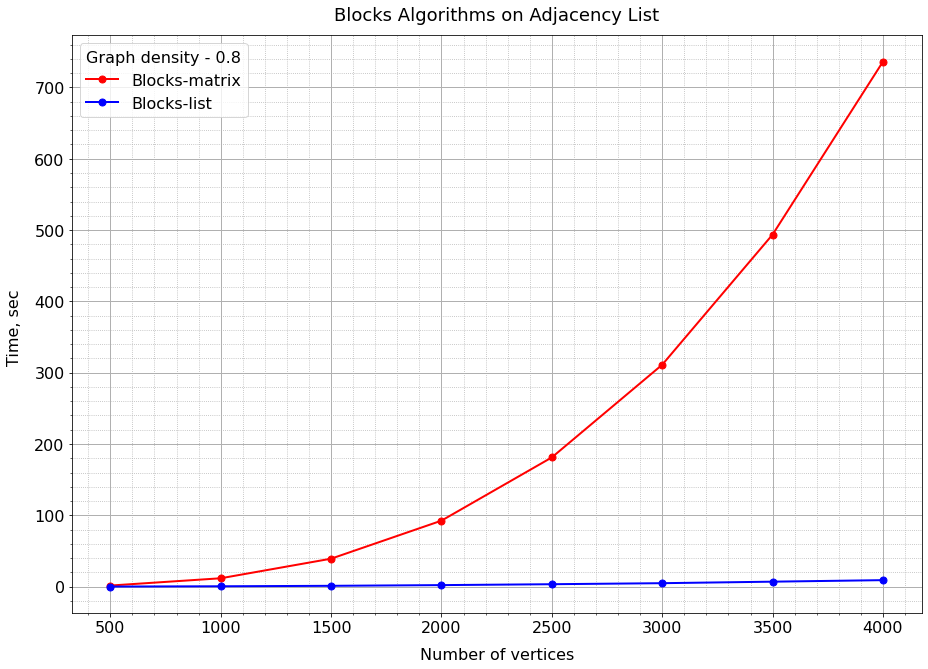

In [ ]:
""" Main class """
import time
import matplotlib.pyplot as plt
import random


def main():

    print('Input count of iter: ')
    count = int(input())
    count_vertex = 500
    interval = 500
    x = [i for i in range(count_vertex, count*count_vertex+1, count_vertex)]
    #print(x)
    y_bfs_mat = [0 for i in range(count)]

    y_dfs_mat = [0 for i in range(count)]

    #y_bfs_list = [0 for i in range(count)]

    #y_dfs_list = [0 for i in range(count)]
    count_graph = 1

    for i in range(count):
        count_time_bfs_mat = 0
        count_time_dfs_mat = 0
        #count_time_bfs_list = 0
        #count_tine_dfs_list = 0
        print('iter - ', i+1)
        for j in range(count_graph):
            #print('count_vertex =' ,count_vertex)
            rand_top = random.randint(0, count_vertex-1)
            #print('rand_top = ', end=' ')
            #print(rand_top)
            graph_mat = AdjacencyMatrix(count_vertex, 0.8)#AdjacencyMatrix(count_vertex, 0.5)
            graph_list = AdjacencyList(create=False)#AdjacencyList()
            graph_list.conversion_from_matrix_to_list(graph_mat.matrix)
            #print(graph_mat)
            #print(graph_list)
            start_time_bfs_mat = time.time()
            tree_bfs_mat, p1 = blocks_for_matrix(graph_mat.matrix, rand_top)
            end_time_bfs_mat = time.time() - start_time_bfs_mat
            
            start_time_dfs_mat = time.time()
            tree_dfs_mat, p2 = blocks_for_list(graph_list.list_, rand_top)
            end_time_dfs_mat = time.time() - start_time_dfs_mat

           # start_time_bfs_list = time.time()
           # tree_list_bfs = bfs_for_list(graph_list.list_, rand_top-1)
           # end_time_bfs_list = time.time() - start_time_bfs_list
           # start_time_dfs_list = time.time()
           # tree_list_dfs = dfs_for_list(graph_list.list_, rand_top-1)
           # end_time_dfs_list = time.time() - start_time_dfs_list

            count_time_bfs_mat += end_time_bfs_mat
            count_time_dfs_mat += end_time_dfs_mat
            #count_time_bfs_list += end_time_bfs_list
            #count_tine_dfs_list += end_time_dfs_list
        count_vertex += interval
        y_bfs_mat[i] = count_time_bfs_mat/count_graph
        y_dfs_mat[i] = count_time_dfs_mat/count_graph
        #y_bfs_list[i] = count_time_bfs_list/count
        #y_dfs_list[i] = count_tine_dfs_list/count

    print(x)
    print(y_bfs_mat)
    print(y_dfs_mat)
   # print(y_bfs_list)
   # print(y_dfs_list)

    plt.figure(figsize=(13,9))   
    plt.rc('legend', fontsize=16)
    #plt.rc('axis', fontsize=16)
    #plt.legend()
    
    #plt.plot(x, y_bfs_mat, 'o-r', label='BFS-matrix', lw=2, ms=7)
    #plt.plot(x, y_dfs_mat, 'o-b', label='DFS-matrix', lw=2, ms=7)
    ax = plt.gca()
    #ax.axhline(y=0, color='k')
    #plt.plot([], [], ' ', label="Graph density - 0.2")
    bfs = ax.plot(x, y_bfs_mat, 'o-r', label='Blocks-matrix', lw=2, ms=7)
    dfs = ax.plot(x, y_dfs_mat, 'o-b', label='Blocks-list', lw=2, ms=7)
    #ax.set_xticks(x)
    #plt.plot(x, y_bfs_list, 'm', label='old')
    #plt.plot(x, y_dfs_list, 'g', label='2')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    
    #plt.plot([], [], ' ', label="dgfgfjgkhj")
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', labelsize=16) 
    plt.ylabel('Time, sec ', fontsize=16, labelpad =12)
    plt.xlabel('Number of vertices',fontsize=16, labelpad =12)
    plt.grid(True)
    plt.grid(which='major', linewidth = 1)
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()
    plt.title('Blocks Algorithms on Adjacency List', fontsize=18, pad=15)    
    plt.legend(title ="Graph density - 0.8",title_fontsize=16)
    
    plt.show()



if __name__ == "__main__":
    main()



In [ ]:
# blocks mat list 0.2
x = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]#, 4500, 5000]
y_bfs_mat = [0.386218786239624, 2.9361817836761475, 9.939330816268921, 23.30792999267578, 45.385268449783325, 78.16949224472046, 123.4379529953003, 182.3734519481659 ] #, 258.602618932724, 357.9013557434082]
y_dfs_mat = [0.02938985824584961, 0.13704776763916016, 0.2779419422149658, 0.49366140365600586, 0.7789337635040283, 1.1223745346069336, 1.60563325881958, 2.0511372089385986 ] #, 2.6326446533203125, 3.646615743637085]

[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
[1.5341730117797852, 11.731983423233032, 39.18544864654541, 92.52144742012024, 181.21524739265442, 311.15614914894104, 493.68323850631714, 736.1424424648285]
[0.11682868003845215, 0.4979584217071533, 1.1527469158172607, 2.135448932647705, 3.4003167152404785, 4.843705415725708, 6.96312141418457, 9.105211019515991]


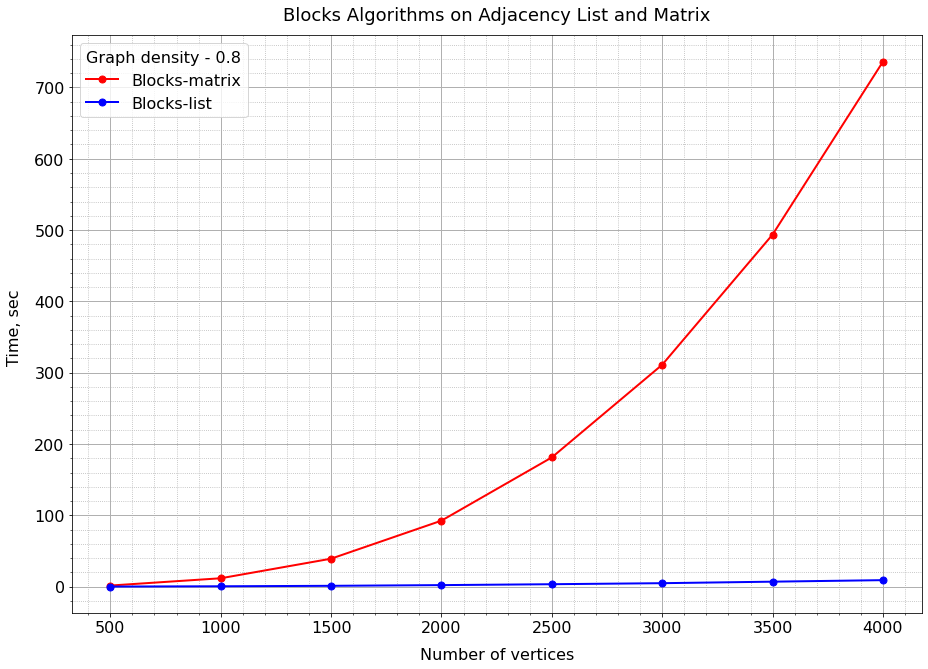

In [ ]:
    print(x)
    print(y_bfs_mat)
    print(y_dfs_mat)
   # print(y_bfs_list)
   # print(y_dfs_list)

    plt.figure(figsize=(13,9))   
    plt.rc('legend', fontsize=16)
    #plt.rc('axis', fontsize=16)
    #plt.legend()
    
    #plt.plot(x, y_bfs_mat, 'o-r', label='BFS-matrix', lw=2, ms=7)
    #plt.plot(x, y_dfs_mat, 'o-b', label='DFS-matrix', lw=2, ms=7)
    ax = plt.gca()
    #ax.axhline(y=0, color='k')
    #plt.plot([], [], ' ', label="Graph density - 0.2")
    bfs = ax.plot(x, y_bfs_mat, 'o-r', label='Blocks-matrix', lw=2, ms=7)
    dfs = ax.plot(x, y_dfs_mat, 'o-b', label='Blocks-list', lw=2, ms=7)
    #ax.set_xticks(x)
    #plt.plot(x, y_bfs_list, 'm', label='old')
    #plt.plot(x, y_dfs_list, 'g', label='2')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    
    #plt.plot([], [], ' ', label="dgfgfjgkhj")
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', labelsize=16) 
    plt.ylabel('Time, sec ', fontsize=16, labelpad =12)
    plt.xlabel('Number of vertices',fontsize=16, labelpad =12)
    plt.grid(True)
    plt.grid(which='major', linewidth = 1)
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()
    plt.title('Blocks Algorithms on Adjacency List and Matrix', fontsize=18, pad=15)    
    plt.legend(title ="Graph density - 0.8",title_fontsize=16)
    
    plt.show()

In [ ]:
# blocks mat list 0.5


x = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
y_bfs_mat = [0.9659981727600098, 7.585477352142334, 25.791563749313354, 61.68717384338379, 121.29544138908386, 210.3395915031433, 335.72619223594666, 502.97607040405273]
y_dfs_mat = [0.0739896297454834, 0.3032567501068115, 0.7099151611328125, 1.2454957962036133, 1.9767560958862305, 2.90195894241333, 4.07848858833313, 5.293942451477051]

In [ ]:
# blocks mat list 0.8

x = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
y_bfs_mat = [1.5341730117797852, 11.731983423233032, 39.18544864654541, 92.52144742012024, 181.21524739265442, 311.15614914894104, 493.68323850631714, 736.1424424648285]
y_dfs_mat = [0.11682868003845215, 0.4979584217071533, 1.1527469158172607, 2.135448932647705, 3.4003167152404785, 4.843705415725708, 6.96312141418457, 9.105211019515991]

In [ ]:
# blocks mat list 0.2
x = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]#, 4500, 5000]
y_bfs_mat_1 = [0.386218786239624, 2.9361817836761475, 9.939330816268921, 23.30792999267578, 45.385268449783325, 78.16949224472046, 123.4379529953003, 182.3734519481659 ] #, 258.602618932724, 357.9013557434082]
y_dfs_mat_1 = [0.02938985824584961, 0.13704776763916016, 0.2779419422149658, 0.49366140365600586, 0.7789337635040283, 1.1223745346069336, 1.60563325881958, 2.0511372089385986 ] #, 2.6326446533203125, 3.646615743637085]

# blocks mat list 0.5


x = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
y_bfs_mat_2 = [0.9659981727600098, 7.585477352142334, 25.791563749313354, 61.68717384338379, 121.29544138908386, 210.3395915031433, 335.72619223594666, 502.97607040405273]
y_dfs_mat_2 = [0.0739896297454834, 0.3032567501068115, 0.7099151611328125, 1.2454957962036133, 1.9767560958862305, 2.90195894241333, 4.07848858833313, 5.293942451477051]
# blocks mat list 0.8

x = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
y_bfs_mat_3 = [1.5341730117797852, 11.731983423233032, 39.18544864654541, 92.52144742012024, 181.21524739265442, 311.15614914894104, 493.68323850631714, 736.1424424648285]
y_dfs_mat_3 = [0.11682868003845215, 0.4979584217071533, 1.1527469158172607, 2.135448932647705, 3.4003167152404785, 4.843705415725708, 6.96312141418457, 9.105211019515991]


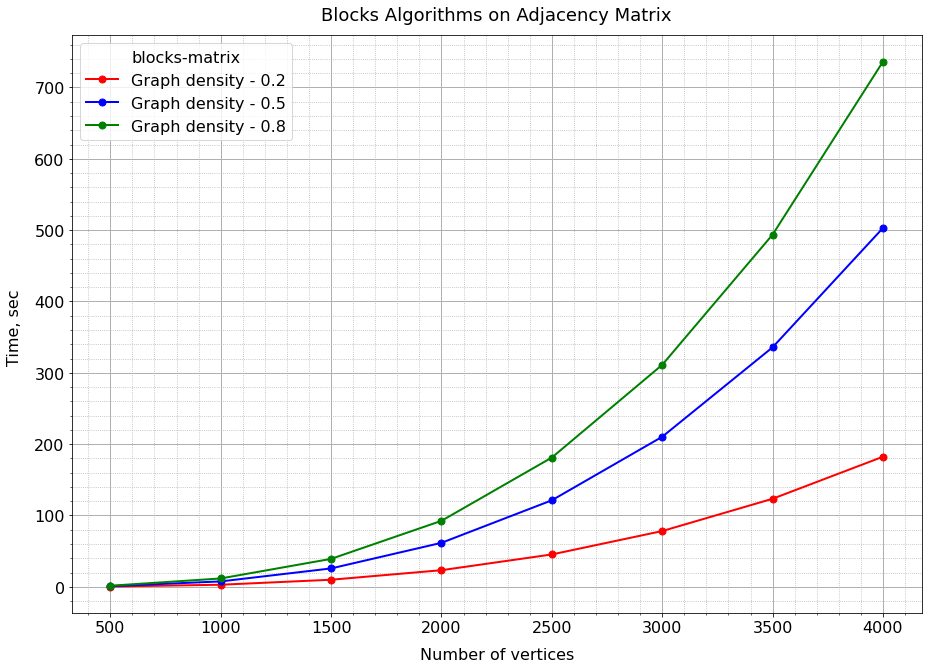

In [ ]:
    plt.figure(figsize=(13,9))   
    plt.rc('legend', fontsize=16)
    #plt.rc('axis', fontsize=16)
    #plt.legend()
    
    #plt.plot(x, y_bfs_mat, 'o-r', label='BFS-matrix', lw=2, ms=7)
    #plt.plot(x, y_dfs_mat, 'o-b', label='DFS-matrix', lw=2, ms=7)
    ax = plt.gca()
    #ax.axhline(y=0, color='k')
    #plt.plot([], [], ' ', label="Graph density - 0.2")
    bfs = ax.plot(x, y_bfs_mat_1, 'o-r', label='Graph density - 0.2', lw=2, ms=7)
    dfs = ax.plot(x, y_bfs_mat_2, 'o-b', label='Graph density - 0.5', lw=2, ms=7)
    dfs_1 = ax.plot(x, y_bfs_mat_3, 'o-g', label='Graph density - 0.8', lw=2, ms=7)
    #ax.set_xticks(x)
    #plt.plot(x, y_bfs_list, 'm', label='old')
    #plt.plot(x, y_dfs_list, 'g', label='2')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    
    #plt.plot([], [], ' ', label="dgfgfjgkhj")
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', labelsize=16) 
    plt.ylabel('Time, sec ', fontsize=16, labelpad =12)
    plt.xlabel('Number of vertices',fontsize=16, labelpad =12)
    plt.grid(True)
    plt.grid(which='major', linewidth = 1)
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()
    plt.title('Blocks Algorithms on Adjacency Matrix', fontsize=18, pad=15)    
    plt.legend(title ="blocks-matrix",title_fontsize=16)
    
    plt.show()

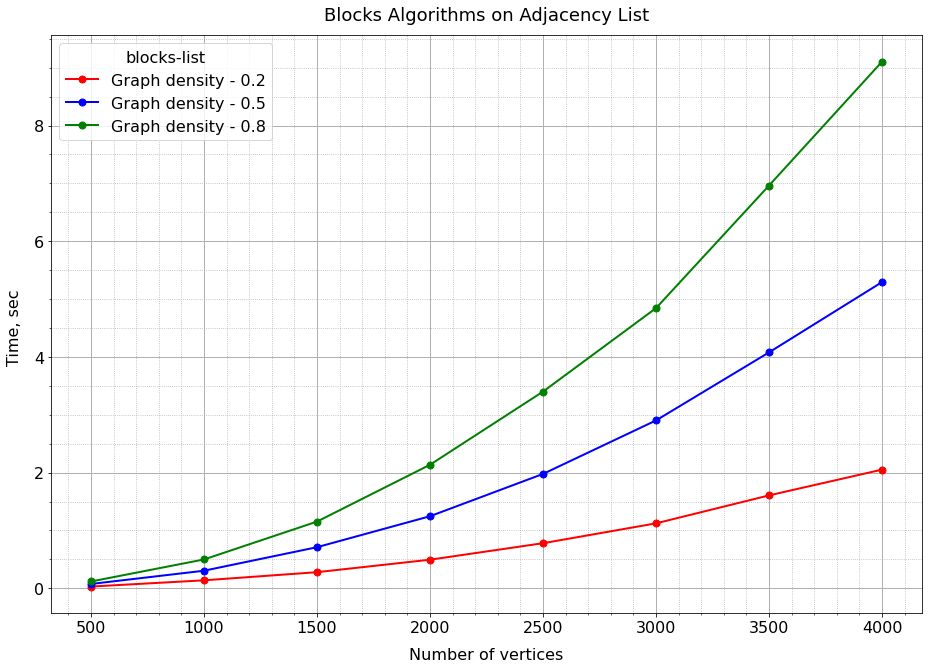

In [ ]:
    plt.figure(figsize=(13,9))   
    plt.rc('legend', fontsize=16)
    #plt.rc('axis', fontsize=16)
    #plt.legend()
    
    #plt.plot(x, y_bfs_mat, 'o-r', label='BFS-matrix', lw=2, ms=7)
    #plt.plot(x, y_dfs_mat, 'o-b', label='DFS-matrix', lw=2, ms=7)
    ax = plt.gca()
    #ax.axhline(y=0, color='k')
    #plt.plot([], [], ' ', label="Graph density - 0.2")
    bfs = ax.plot(x, y_dfs_mat_1, 'o-r', label='Graph density - 0.2', lw=2, ms=7)
    dfs = ax.plot(x, y_dfs_mat_2, 'o-b', label='Graph density - 0.5', lw=2, ms=7)
    dfs_1 = ax.plot(x, y_dfs_mat_3, 'o-g', label='Graph density - 0.8', lw=2, ms=7)
    #ax.set_xticks(x)
    #plt.plot(x, y_bfs_list, 'm', label='old')
    #plt.plot(x, y_dfs_list, 'g', label='2')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    
    #plt.plot([], [], ' ', label="dgfgfjgkhj")
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', labelsize=16) 
    plt.ylabel('Time, sec ', fontsize=16, labelpad =12)
    plt.xlabel('Number of vertices',fontsize=16, labelpad =12)
    plt.grid(True)
    plt.grid(which='major', linewidth = 1)
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()
    plt.title('Blocks Algorithms on Adjacency List', fontsize=18, pad=15)    
    plt.legend(title ="blocks-list",title_fontsize=16)
    
    plt.show()

Input count of iter: 
8
iter -  1
iter -  2
iter -  3
iter -  4
iter -  5
iter -  6
iter -  7
iter -  8
[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
[1.53629732131958, 11.726447582244873, 39.23126482963562, 93.91737008094788, 182.3509166240692, 311.01344442367554, 496.1905951499939, 741.7170293331146]
[0.11753058433532715, 0.4979372024536133, 1.1312975883483887, 2.1443169116973877, 3.3892390727996826, 4.810734748840332, 6.844237327575684, 9.045399188995361]


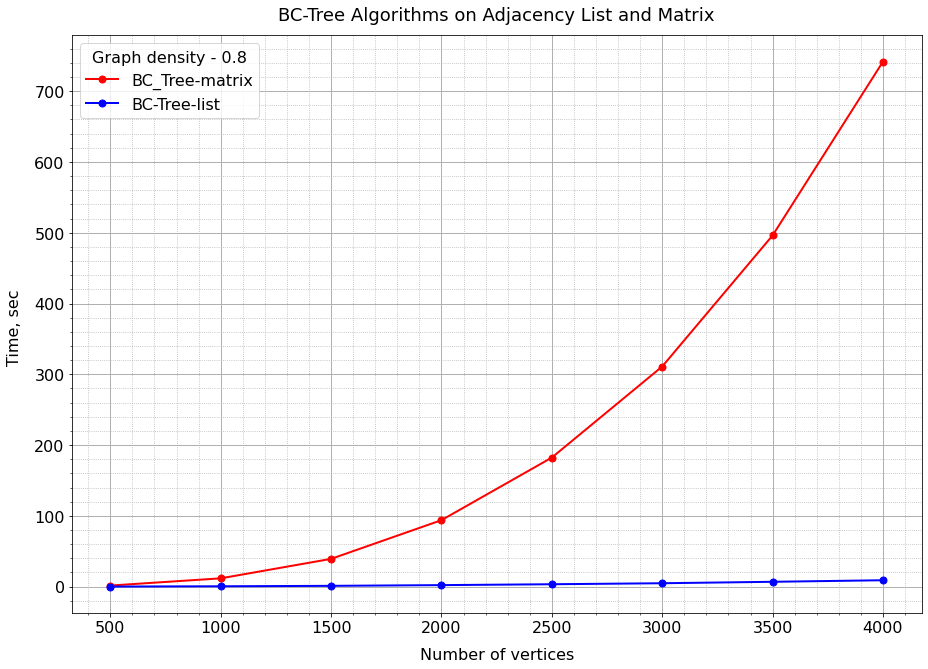

In [ ]:
""" Main class """
import time
import matplotlib.pyplot as plt
import random


def main():

    print('Input count of iter: ')
    count = int(input())
    count_vertex = 500
    interval = 500
    x = [i for i in range(count_vertex, count*count_vertex+1, count_vertex)]
    #print(x)
    y_bfs_mat = [0 for i in range(count)]

    y_dfs_mat = [0 for i in range(count)]

    #y_bfs_list = [0 for i in range(count)]

    #y_dfs_list = [0 for i in range(count)]
    count_graph = 1

    for i in range(count):
        count_time_bfs_mat = 0
        count_time_dfs_mat = 0
        #count_time_bfs_list = 0
        #count_tine_dfs_list = 0
        print('iter - ', i+1)
        for j in range(count_graph):
            #print('count_vertex =' ,count_vertex)
            rand_top = random.randint(0, count_vertex-1)
            #print('rand_top = ', end=' ')
            #print(rand_top)
            graph_mat = AdjacencyMatrix(count_vertex, 0.8)#AdjacencyMatrix(count_vertex, 0.5)
            graph_list = AdjacencyList(create=False)#AdjacencyList()
            graph_list.conversion_from_matrix_to_list(graph_mat.matrix)
            #print(graph_mat)
            #print(graph_list)
            start_time_bfs_mat = time.time()
            tree_bfs_mat = BCTree_for_matrix(graph_mat.matrix, rand_top)
            end_time_bfs_mat = time.time() - start_time_bfs_mat
            
            start_time_dfs_mat = time.time()
            tree_dfs_mat = BCTree_for_list(graph_list.list_, rand_top)
            end_time_dfs_mat = time.time() - start_time_dfs_mat

           # start_time_bfs_list = time.time()
           # tree_list_bfs = bfs_for_list(graph_list.list_, rand_top-1)
           # end_time_bfs_list = time.time() - start_time_bfs_list
           # start_time_dfs_list = time.time()
           # tree_list_dfs = dfs_for_list(graph_list.list_, rand_top-1)
           # end_time_dfs_list = time.time() - start_time_dfs_list

            count_time_bfs_mat += end_time_bfs_mat
            count_time_dfs_mat += end_time_dfs_mat
            #count_time_bfs_list += end_time_bfs_list
            #count_tine_dfs_list += end_time_dfs_list
        count_vertex += interval
        y_bfs_mat[i] = count_time_bfs_mat/count_graph
        y_dfs_mat[i] = count_time_dfs_mat/count_graph
        #y_bfs_list[i] = count_time_bfs_list/count
        #y_dfs_list[i] = count_tine_dfs_list/count

    print(x)
    print(y_bfs_mat)
    print(y_dfs_mat)
   # print(y_bfs_list)
   # print(y_dfs_list)

    plt.figure(figsize=(13,9))   
    plt.rc('legend', fontsize=16)
    #plt.rc('axis', fontsize=16)
    #plt.legend()
    
    #plt.plot(x, y_bfs_mat, 'o-r', label='BFS-matrix', lw=2, ms=7)
    #plt.plot(x, y_dfs_mat, 'o-b', label='DFS-matrix', lw=2, ms=7)
    ax = plt.gca()
    #ax.axhline(y=0, color='k')
    #plt.plot([], [], ' ', label="Graph density - 0.2")
    bfs = ax.plot(x, y_bfs_mat, 'o-r', label='BC_Tree-matrix', lw=2, ms=7)
    dfs = ax.plot(x, y_dfs_mat, 'o-b', label='BC-Tree-list', lw=2, ms=7)
    #ax.set_xticks(x)
    #plt.plot(x, y_bfs_list, 'm', label='old')
    #plt.plot(x, y_dfs_list, 'g', label='2')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    
    #plt.plot([], [], ' ', label="dgfgfjgkhj")
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', labelsize=16) 
    plt.ylabel('Time, sec ', fontsize=16, labelpad =12)
    plt.xlabel('Number of vertices',fontsize=16, labelpad =12)
    plt.grid(True)
    plt.grid(which='major', linewidth = 1)
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()
    plt.title('BC-Tree Algorithms on Adjacency List and Matrix', fontsize=18, pad=15)    
    plt.legend(title ="Graph density - 0.8",title_fontsize=16)
    
    plt.show()



if __name__ == "__main__":
    main()



In [ ]:
# bc-tree mat list 0.8

[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
[1.53629732131958, 11.726447582244873, 39.23126482963562, 93.91737008094788, 182.3509166240692, 311.01344442367554, 496.1905951499939, 741.7170293331146]
[0.11753058433532715, 0.4979372024536133, 1.1312975883483887, 2.1443169116973877, 3.3892390727996826, 4.810734748840332, 6.844237327575684, 9.045399188995361]

In [ ]:
0.2
x = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
y1 = [0.0007206439971923828, 0.0021591424942016602, 0.004593443870544433, 0.00754852294921875, 0.011051750183105469, 0.014986157417297363, 0.020667648315429686, 0.027971935272216798, 0.03581440448760986, 0.04233536720275879]
z1 = [0.0012204170227050782, 0.0036120891571044924, 0.007944631576538085, 0.015536117553710937, 0.02350168228149414, 0.03355097770690918, 0.04753346443176269, 0.06260318756103515, 0.07841100692749023, 0.09931719303131104]

0.5
y2 = [0.0018024444580078125, 0.0061979532241821286, 0.01361227035522461, 0.023277425765991212, 0.036694812774658206, 0.05502860546112061, 0.07252788543701172, 0.09158573150634766, 0.11732451915740967, 0.1469710111618042]
z2 = [0.002380657196044922, 0.00764622688293457, 0.018604469299316407, 0.03170192241668701, 0.049870657920837405, 0.07493627071380615, 0.10105009078979492, 0.12953290939331055, 0.16648223400115966, 0.2075394868850708]

0.8
y3 = [0.003672671318054199, 0.013137173652648926, 0.028114795684814453, 0.048811912536621094, 0.07527589797973633, 0.10837650299072266, 0.1527559995651245, 0.19641735553741455, 0.2448068380355835, 0.31043717861175535]
z3 = [0.004115509986877442, 0.01427760124206543, 0.03203442096710205, 0.057780909538269046, 0.08824262619018555, 0.1297079086303711, 0.18312482833862304, 0.2320413112640381, 0.2932675123214722, 0.3684332847595215]


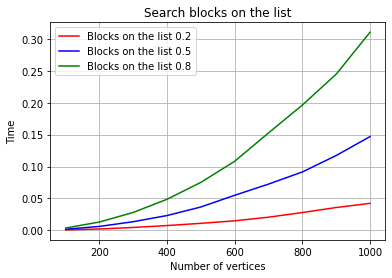

In [ ]:
plt.figure(1)
plt.grid()
plt.plot(x, y1, 'r', label='Blocks on the list 0.2')
plt.plot(x, y2, 'b', label='Blocks on the list 0.5')
plt.plot(x, y3, 'g', label='Blocks on the list 0.8')
#plt.plot(x, y_bfs_list, 'm', label='Dijkstra on the list 0.8')
plt.ylabel('Time')
plt.xlabel('Number of vertices')
plt.title('Search blocks on the list')
plt.legend()
plt.show()

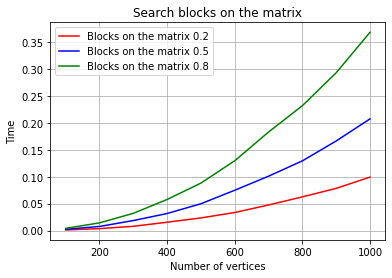

In [ ]:
    plt.figure(1)
    plt.grid()
    plt.plot(x, z1, 'r', label='Blocks on the matrix 0.2')
    plt.plot(x, z2, 'b', label='Blocks on the matrix 0.5')
    plt.plot(x, z3, 'g', label='Blocks on the matrix 0.8')
    #plt.plot(x, y_bfs_list, 'm', label='Dijkstra on the list 0.8')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    plt.ylabel('Time')
    plt.xlabel('Number of vertices')
    plt.title('Search blocks on the matrix')
    plt.legend()
    plt.show()

#TREE

In [ ]:
"""class Tree: adjacency matrix and list"""
import random
#from graph import AdjacencyList, AdjacencyMatrix


class Tree:
    list_tree = AdjacencyList()
    matrix_tree = AdjacencyMatrix()

    def __init__(self, size=2):
        pru_cod = [random.randint(1, size) for i in range(size - 2)]
        
        self.matrix_tree = AdjacencyMatrix(size, create=False)
        for i in range(len(pru_cod)):
            flag = 0
            visits = [False for i in range(size)]
            for j in range(len(pru_cod)):
                visits[pru_cod[j] - 1] = True
            for j in range(len(visits)):
                if not visits[j]:
                    flag += 1
                    if flag == 1:
                        self.matrix_tree.matrix[pru_cod[i] - 1][j] = 1
                        self.matrix_tree.matrix[j][pru_cod[i] - 1] = 1
                        pru_cod[i] = j + 1

        flag = 0
        visits = [False for i in range(size)]
        for j in range(len(pru_cod)):
            visits[pru_cod[j] - 1] = True
        for i in range(size):
            if not visits[i]:
                if flag == 0:
                    index = i
                    flag += 1
                else:
                    self.matrix_tree.matrix[i][index] = 1
                    self.matrix_tree.matrix[index][i] = 1

        self.list_tree = AdjacencyList(size, create=False)
        self.list_tree.conversion_from_matrix_to_list(self.matrix_tree.matrix)


#a = Tree(4)

#print(a.matrix_tree)
#print(a.list_tree)







#WEIGHT_GRAPH

In [ ]:
import random


class GraphList:
    list_ = []

    def __init__(self, size=1, probability=0.5, max_weight=100, create=True):
       
        if create:
            self.list_ = [{} for i in range(size)]

            rand = int(random.random() * max_weight) + 1
            self.list_[0][1] = rand
            self.list_[1][0] = rand
            
            rand1 = int(random.random() * max_weight) + 1
            self.list_[size - 1][size - 2] = rand1
            self.list_[size - 2][size - 1] = rand1
            
            for i in range(1, size - 1):
                rand = int(random.random() * max_weight) + 1
                self.list_[i][i - 1] = rand
                self.list_[i - 1][i] = rand
                rand1 = int(random.random() * max_weight) + 1
                self.list_[i][i + 1] = rand1
                self.list_[i + 1][i] = rand1
            
            for i in range(size-2):
                for j in range(i+2,size):
                    if random.random() < probability:
                        rand = int(random.random() * max_weight) + 1
                        self.list_[i][j] = rand
                        self.list_[j][i] = rand
            

    def __str__(self):
        string_list = ''
        for i in range(len(self.list_)):
            string_list += (str(i) + ' - ' +
                            '[' + ' '.join(['{'
                                            + str(elem) + ': ' + str(self.list_[i][elem]) +
                                            '}'
                                            for elem in self.list_[i]]) +
                            ']' + '\n')
        return string_list

    def conversion_from_matrix_to_list(self, matrix):  # можно подправить
        self.list_ = [{} for i in range(len(matrix))]
        for i in range(len(matrix)):
            for j in range(len(matrix)):
                if matrix[i][j] != 0 and matrix[i][j] != float('inf'):
                    self.list_[i][j] = matrix[i][j]


class GraphMatrix:
    #inf = 1000000000   # replace float('inf) to inf
    matrix = []

    def __init__(self, size=1, probability=0.5, max_weight=100):
        self.matrix = [[0] * size for i in range(size)]
        for i in range(1, size):
            rand = int(random.random() * max_weight) + 1
            self.matrix[i - 1][i] = rand
            self.matrix[i][i - 1] = rand
        
        for i in range(size):
            for j in range(2 + i, len(self.matrix[i])):
                if random.random() < probability:
                    rand = int(random.random() * max_weight) + 1
                    self.matrix[i][j] = rand
                    self.matrix[j][i] = rand
                else:
                    self.matrix[i][j] = 0
                    self.matrix[j][i] = 0
        

    def __str__(self):
        string_matrix = ''
        for row in self.matrix:
            string_matrix += (' '.join([str(elem) for elem in row]) + '\n')
        return string_matrix


# c = GraphMatrix(3)

# b = GraphList(create=False)
# b.conversion_from_matrix_to_list(c.matrix)
# print(c)
# print(b)

In [ ]:
weig = GraphMatrix(6)

In [ ]:
weig_l = GraphList(create=False)

In [ ]:
weig_l.conversion_from_matrix_to_list(weig.matrix)

# Новые алгоритмы

### Шарниры

In [ ]:
"module  articulation points of matrix and of list"   ### НОВАЯ ВЕРСИЯ

from collections import deque


def cut_vertex_for_matrix(matrix, root):
    copy_matrix = [elem[:] for elem in matrix]
    cut_vertex = []
    c = 1
    sons_of_root = set()
    dnum = [0 if i != root else c for i in range(len(matrix))]
    low = [0 if i != root else c for i in range(len(matrix))]       
    stack = deque([root])      #стек / чтобы избежать рекурсии

    while stack:                      
        vertex = stack[-1]
        if sum(copy_matrix[vertex]) != 0:
          neighbour = copy_matrix[vertex].index(1)
          copy_matrix[vertex][neighbour] =  0
          if dnum[neighbour] == 0:
             c = c + 1
             stack.append(neighbour)
             dnum[neighbour] = c
             low[neighbour] = c   
             if vertex == root:
               sons_of_root.add(neighbour)            
          else: 
            low[vertex] = min(low[vertex],dnum[neighbour])                              
        else:
          top = stack.pop()
          if top != root:
            vertex = stack[-1]
            if vertex != root:
              low[vertex]=min(low[vertex],low[top])
              if low[top] == dnum[vertex]:
                cut_vertex.append(vertex)
    if len(sons_of_root) > 1:
      cut_vertex.append(root)

    return cut_vertex


def cut_vertex_for_list(list_, root):
    copy_list = [elem[:] for elem in list_]
    cut_vertex = []
    c = 1
    sons_of_root = set()
    dnum = [0 if i != root else c for i in range(len(list_))]
    low = [0 if i != root else c for i in range(len(list_))]      
    stack = deque([root])      #стек / чтобы избежать рекурсии

    while stack:                      
        vertex = stack[-1]
        if copy_list[vertex]:
          neighbour = copy_list[vertex][0]
          copy_list[vertex].remove(neighbour)
          if dnum[neighbour] == 0:
             c = c + 1
             stack.append(neighbour)
             dnum[neighbour] = c
             low[neighbour] = c   
             if vertex == root:
               sons_of_root.add(neighbour)            
          else: 
            low[vertex] = min(low[vertex],dnum[neighbour])                              
        else:
          top = stack.pop()
          if top != root:
            vertex = stack[-1]
            if vertex != root:
              low[vertex]=min(low[vertex],low[top])
              if low[top] == dnum[vertex]:
                cut_vertex.append(vertex)
    if len(sons_of_root) > 1:
      cut_vertex.append(root)

    return cut_vertex


In [ ]:
""" Main class """
import time
import matplotlib.pyplot as plt
import random


def main():

    print('Input count while: ')
    count = int(input())
    interval = 500
    x = [i for i in range(interval, count*interval+1, interval)]
    y_bfs_mat = [0 for i in range(count)]

    y_dfs_mat = [0 for i in range(count)]

    y_bfs_list = [0 for i in range(count)]

    y_dfs_list = [0 for i in range(count)]

    for i in range(count):
        count_time_bfs_mat = 0
        count_time_dfs_mat = 0
        count_time_bfs_list = 0
        count_tine_dfs_list = 0
        print(i+1)
        for j in range(10):
            rand_top = random.randint(0, interval-1)
            #print('rand_top = ', end=' ')
            #print(rand_top)
            #graph_mat = AdjacencyMatrix(interval, 0.5)
            #graph_list = AdjacencyList()
            #graph_list.conversion_from_matrix_to_list(graph_mat.matrix)
            #print(graph_mat)
            #print(graph_list)
            graph_mat = AdjacencyMatrix(interval, probability=0.9)
            graph_list = AdjacencyList(create=False)
            graph_list.conversion_from_matrix_to_list(graph_mat.matrix)
            
            start_time_bfs_mat = time.time()
            #distance_mat, path_mat = dijkstra_for_matrix(graph_mat.matrix, rand_top)
            tree_mat = cut_vertex_for_matrix(graph_mat.matrix, rand_top)
            end_time_bfs_mat = time.time() - start_time_bfs_mat
            
            start_time_dfs_mat = time.time()
            ##tree_mat_new = bfs_for_matrix_new(graph_mat.matrix, rand_top-1)
            tree_mat_dfs = cut_vertex_for_list(graph_list.list_, rand_top)
            #distance_list, path_list = dijkstra_for_list(graph_list.list_, rand_top)
            end_time_dfs_mat = time.time() - start_time_dfs_mat

            start_time_bfs_list = time.time()
           # tree_list_bfs, path_3 = dijkstra_for_matrix_old(graph_mat.matrix, rand_top)
            end_time_bfs_list = time.time() - start_time_bfs_list

            start_time_dfs_list = time.time()
            ##tree_list_bfs = bfs_for_list_new(graph_list.list_, rand_top-1)
            #print('hi')
            #tree_list_dfs = dfs_for_list(graph_list.list_, rand_top-1)
            end_time_dfs_list = time.time() - start_time_dfs_list

            count_time_bfs_mat += end_time_bfs_mat
            count_time_dfs_mat += end_time_dfs_mat
            count_time_bfs_list += end_time_bfs_list
            #count_tine_dfs_list += end_time_dfs_list
        interval += 100
        y_bfs_mat[i] = count_time_bfs_mat/count
        y_dfs_mat[i] = count_time_dfs_mat/count
        y_bfs_list[i] = count_time_bfs_list/count
        #y_dfs_list[i] = count_tine_dfs_list/count

    print(x)
    print(y_bfs_mat)
    #print(y_bfs_list)
    #print(y_dfs_list)
    print(y_dfs_mat)

    plt.figure(1,figsize=(10,10))
    plt.grid()
    plt.rc('legend', fontsize=16)
    #plt.rc('axis', fontsize=16)
    #plt.legend()
    plt.plot(x, y_bfs_mat, 'r', label='mat' )
    plt.plot(x, y_dfs_mat, 'b', label='list')
    #plt.plot(x, y_bfs_list, 'm', label='old')
    #plt.plot(x, y_dfs_list, 'g', label='2')
    #plt.plot(x, y_dfs_list, 'g', label='DFS-list')
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.ylabel('Time', fontsize=16)
    plt.xlabel('Number of vertices',fontsize=16)
    plt.title('Dijkstra on the list', fontsize=16)
    plt.legend()
    plt.show()


if __name__ == "__main__":
    main()

Input count while: 


KeyboardInterrupt: ignored

In [ ]:
graph = AdjacencyMatrix(6, probability=0.15)

In [ ]:
cut = cut_vertex_for_matrix(graph.matrix,5)

In [ ]:
cut

[1, 2]

In [ ]:
graph_l = AdjacencyList(create=False)

In [ ]:
graph_l.conversion_from_matrix_to_list(graph.matrix)

In [ ]:
cut_l = cut_vertex_for_list(graph_l.list_,5)

In [ ]:
cut_l

[1, 2]

### Блоки

In [ ]:
"module  blocks of matrix and of list"   ### НОВАЯ ВЕРСИЯ

from collections import deque

def new_block(stack, cut, son):
  block = []
  curr_top = -1
  block.append(cut)
  while curr_top != son:
     curr_top = stack.pop()
     block.append(curr_top)

  return block


def blocks_for_matrix(matrix, root=0):
    copy_matrix = [elem[:] for elem in matrix]
    cut_vertex = []
    c = 1
    sons_of_root = []
    dnum = [0 if i != root else c for i in range(len(matrix))]
    low = [0 if i != root else c for i in range(len(matrix))]       
    stack = deque([root])      #стек / чтобы избежать рекурсии
    blocks = []  # блоки
    stack_for_block = deque([root])
    
    while stack:                      
        vertex = stack[-1]
        if sum(copy_matrix[vertex]) != 0:
          neighbour = copy_matrix[vertex].index(1)
          copy_matrix[vertex][neighbour] =  0
          if dnum[neighbour] == 0:
             stack_for_block.append(neighbour)
             c = c + 1
             stack.append(neighbour)
             dnum[neighbour] = c
             low[neighbour] = c   
             if vertex == root:
               sons_of_root.append(neighbour)                      
          else: 
            low[vertex] = min(low[vertex],dnum[neighbour])                              
        else:
          top = stack.pop()
          if top != root:
            vertex = stack[-1]
            if vertex != root:
              low[vertex]=min(low[vertex],low[top])
              if low[top] == dnum[vertex]:                
                cut_vertex.append(vertex)
                block = new_block(stack_for_block, vertex, top)
                blocks.append(block)
    if len(sons_of_root) > 1:
      cut_vertex.append(root)
      for son in sons_of_root[1:]:
        block = new_block(stack_for_block, root, son)
        blocks.append(block)
    if stack_for_block:
      block = []
      while stack_for_block:
        block.append(stack_for_block.pop())
      blocks.append(block)

    return blocks, cut_vertex


def blocks_for_list(list_, root=0):
    copy_list = [elem[:] for elem in list_]
    cut_vertex = []
    c = 1
    sons_of_root = []
    dnum = [0 if i != root else c for i in range(len(list_))]
    low = [0 if i != root else c for i in range(len(list_))]      
    stack = deque([root])      #стек / чтобы избежать рекурсии
    blocks = []  # блоки
    stack_for_block = deque([root])

    while stack:                      
        vertex = stack[-1]
        if copy_list[vertex]:
          neighbour = copy_list[vertex][0]
          copy_list[vertex].remove(neighbour)
          if dnum[neighbour] == 0:
             stack_for_block.append(neighbour)
             c = c + 1
             stack.append(neighbour)
             dnum[neighbour] = c
             low[neighbour] = c   
             if vertex == root:
               sons_of_root.append(neighbour) 
          else: 
            low[vertex] = min(low[vertex],dnum[neighbour])                              
        else:
          top = stack.pop()
          if top != root:
            vertex = stack[-1]
            if vertex != root:
              low[vertex]=min(low[vertex],low[top])
              if low[top] == dnum[vertex]:
                cut_vertex.append(vertex)
                block = new_block(stack_for_block, vertex, top)
                blocks.append(block)
    if len(sons_of_root) > 1:
      cut_vertex.append(root)
      for son in sons_of_root[1:]:
        block = new_block(stack_for_block, root, son)
        blocks.append(block)
    if stack_for_block:
      block = []
      while stack_for_block:
        block.append(stack_for_block.pop())
      blocks.append(block)   

    return blocks, cut_vertex


In [ ]:
graph_mat = AdjacencyMatrix(10, probability=0.15)

In [ ]:
blocks_for_matrix(graph_mat.matrix, 7)

[[1, 0], [3, 2, 1], [8, 9], [8, 6, 5, 4, 3, 7]]

In [ ]:
graph_list = AdjacencyList(create=False)
graph_list.conversion_from_matrix_to_list(graph_mat.matrix)

In [ ]:
blocks_for_list(graph_list.list_, 7)

[[1, 0], [3, 2, 1], [8, 9], [8, 6, 5, 4, 3, 7]]

### BC-дерево

In [ ]:
"""class for bc-tree"""

import random

class BCTreeList:
    
    tree_list_ = []   # tree
    items = None        # blocks and cut vertex

    def __init__(self, blocks, cut_vertex):
      if cut_vertex:
        self.items = blocks + [[i] for i in cut_vertex]
        self.tree_list_ = [[] for i in range(len(blocks)+len(cut_vertex))]
        for i in range(len(blocks)):
          for j in range(len(cut_vertex)):
            if cut_vertex[j] in blocks[i]:
              self.tree_list_[i].append(j+len(blocks))
              self.tree_list_[j+len(blocks)].append(i)
      else:
        self.tree_list_ = [[]]
        self.items = blocks
      
    def __str__(self):
        string_list = ''
        i = 0
        for row in self.tree_list_:
            string_list += (str(i) + ' - ' + '[' + ' '.join([str(elem) for elem in self.items[i]]) +']' + ': ' + ' '.join([str(elem) for elem in row]) + '\n')
            i += 1
        return string_list

class BCTreeMatrix:

    items = None
    tree_matrix = []

    def __init__(self, blocks, cut_vertex):
      if cut_vertex:
        self.items = blocks + [[i] for i in cut_vertex]
        self.tree_matrix = [[0] * (len(blocks)+len(cut_vertex)) for i in range(len(blocks)+len(cut_vertex))]
        for i in range(len(blocks)):
          for j in range(len(cut_vertex)):
            if cut_vertex[j] in blocks[i]:
              self.tree_matrix[i][j+len(blocks)] = 1
              self.tree_matrix[j+len(blocks)][i] = 1
      else:
        self.tree_matrix = [[0]]
        self.items = blocks
        
    def __str__(self):
        string_matrix = 'Tree: ' + '\n'
        for row in self.tree_matrix:
            string_matrix += (' '.join([str(elem) for elem in row]) + '\n')
        string_matrix += '\n'
        for i in range(len(self.tree_matrix)):
          string_matrix += (str(i) + ' - ' +'[' + ' '.join([str(elem) for elem in self.items[i]])+']' + '\n')
          
        return string_matrix

In [ ]:
"module bc-tree for matrix and of list"   ### НОВАЯ ВЕРСИЯ   #  len(blocks)   +   len(cut_vertex)

def BCTree_for_matrix(matrix, root=0):
    blocks, cut_vertex = blocks_for_matrix(matrix,root)
    bctree = BCTreeMatrix(blocks, cut_vertex)    
    return bctree


def BCTree_for_list(list_, root=0):
    blocks, cut_vertex = blocks_for_list(list_,root)
    bctree = BCTreeList(blocks, cut_vertex)  
    return bctree

In [ ]:
graph = AdjacencyMatrix(76, probability=0.0012)

In [ ]:
cut_vertex_for_matrix(graph.matrix,0)

[74, 73, 72, 71, 70, 3, 2, 1]

In [ ]:
blocks_for_matrix(graph.matrix) ;

In [ ]:
bc = BCTree_for_matrix(graph.matrix)

In [ ]:
print(bc)

Tree: 
0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0

0 - [74 75]
1 - [73 74]
2 - [72 73]
3 - [71 72]
4 - [70 71]
5 - [3 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4]
6 - [2 3]
7 - [1 2]
8 - [1 0]
9 - [74]
10 - [73]
11 - [72]
12 - [71]
13 - [70]
14 - [3]
15 - [2]
16 - [1]



In [ ]:
graph_l = AdjacencyList(create=False)

In [ ]:
graph_l.conversion_from_matrix_to_list(graph.matrix)

In [ ]:
blocks_for_list(graph_l.list_) ;

In [ ]:
bc_l = BCTree_for_list(graph_l.list_)

#Дополнительно

###Алгоритмы на больших графах

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd

In [ ]:
graph = AdjacencyMatrix(300)

In [ ]:
H=nx.Graph(np.array(graph.matrix)) 

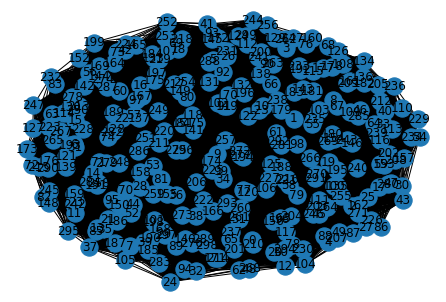

In [ ]:
nx.draw(H,with_labels = True)

In [ ]:
import bisect 
from collections import deque
import numpy as np
import time

In [ ]:
def bfs_for_matrix_np(matrix, root):
    tree_matrix = np.zeros((matrix.shape[0],matrix.shape[0])) #возможно для 
                                                                  # экономии памяти использовать диагональную матрицу (если будет время) 
    queue = deque([root])      #очередь
    visited = np.zeros(matrix.shape[0],dtype=bool)            #посещенные вершины (флаги)
    visited[root] = True
    while queue:
        vertex = queue.popleft()
        for i in range(matrix.shape[0]):        # проходим по соседям (все индексы)
            if matrix[vertex][i] == 1  and not visited[i]:
                visited[i] = True            
                queue.append(i)
                tree_matrix[vertex][i] = tree_matrix[i][vertex] = 1 # заполняем дерево 
    return tree_matrix

In [ ]:
mat = AdjacencyMatrix(50000)

In [ ]:
start = time.time()
h = bfs_for_matrix(mat.matrix,1)
fin = time.time() - start

In [ ]:
print(fin)

11.630526304244995


In [ ]:
st = time.time()
n = bfs_for_matrix_np(arr,1)
f = time.time() - st

In [ ]:
print(f)

61.35560727119446


In [ ]:
graph = AdjacencyMatrix(1376)

In [ ]:
H=nx.Graph(np.array(arr)) 

In [ ]:
H.get_edge_data(0,2)['weight'] == 1

True

In [ ]:
start = time.time()
m = bfs_for_matrix(graph.matrix, 1)
fin = time.time() - start

In [ ]:
print(fin)

0.17220401763916016


In [ ]:
def bfs_for_matrix_np(matrix, root):  #.index[un_2[0] == 101][0]
    tree_matrix = nx.Graph() #возможно для # экономии памяти использовать диагональную матрицу (если будет время) 
    queue = deque([root])      #очередь
    visited = np.zeros(matrix.number_of_nodes(),dtype=bool)            #посещенные вершины (флаги)
    visited[root] = True
    while queue:
        vertex = queue.popleft()
        for i in list(matrix.neighbors(vertex)):
            if not visited[i]:
                visited[i] = True        
                queue.append(i)
                tree_matrix.add_edges_from([(vertex,i),(i,vertex)])#             [vertex][i] = tree_matrix[i][vertex] = 1 # заполняем дерево 
    return tree_matrix

In [ ]:
st = time.time()
H_new = bfs_for_matrix_np(Hnew,11116)
f = time.time() - st

In [ ]:
print(f)

0.06607961654663086


In [ ]:
df.loc[df[0] == 1970109]

,0,1
5120041,1970109,1818252
5120042,1970109,1818261
5120043,1970109,1970108


In [ ]:
Hnew = nx.from_pandas_edgelist(df, 0, 1, create_using=nx.DiGraph())

In [ ]:
df = pd.read_table('web-Google.txt', sep='\t', engine='python', skiprows=4, header=None)

In [ ]:
df.shape

(5105039, 2)

###Алгоритмы на большом графе из dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_table('/content/drive/MyDrive/web-Google.txt', sep='\t', engine='python', skiprows=4, names=['from', 'to']) 

In [ ]:
import networkx as nx
G = nx.Graph()

In [ ]:
G = nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph())

In [ ]:
G.number_of_edges()

5105039

In [ ]:
G.number_of_nodes()

875713

In [ ]:
c = sorted(nx.weakly_connected_components(G), key=len, reverse=True)
wcc_set = c[0]
G_con = G.subgraph(wcc_set)

In [ ]:
G_con.number_of_edges()

5066842

In [ ]:
G_con.number_of_nodes()

855802

In [ ]:
type(G_con)

networkx.classes.digraph.DiGraph

In [ ]:
df_con = nx.to_pandas_edgelist(G_con)

In [ ]:
df_con

,source,target
0,0,11342
1,0,824020
2,0,867923
3,0,891835
4,11342,0
...,...,...
5066837,916425,547323
5066838,916425,604833
5066839,916425,632916
5066840,916425,637936


In [ ]:
nodes = pd.DataFrame(np.unique(df_con[['source','target']].values))

In [ ]:
nodes 

,0
0,0
1,1
2,2
3,3
4,4
...,...
855797,916423
855798,916424
855799,916425
855800,916426


In [ ]:
df_new = pd.DataFrame(df_con,columns = ['from_new','to_new'])

In [ ]:
df_new

,from_new,to_new
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
5066837,NaN,NaN
5066838,NaN,NaN
5066839,NaN,NaN
5066840,NaN,NaN


In [ ]:
i=0
for idx in range(df_con.shape[0]):
  i += 1
  if not i % 50000: print(i)
  df_new['from_new'][idx] = nodes.index[nodes[0] == df_con['source'][idx]][0]
  df_new['to_new'][idx] =  nodes.index[nodes[0] == df_con['target'][idx]][0]

50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000
950000
1000000
1050000
1100000
1150000
1200000
1250000
1300000
1350000
1400000
1450000
1500000
1550000
1600000
1650000
1700000
1750000
1800000
1850000
1900000
1950000
2000000
2050000
2100000
2150000
2200000
2250000
2300000
2350000
2400000
2450000
2500000
2550000
2600000
2650000
2700000
2750000
2800000
2850000
2900000
2950000
3000000
3050000
3100000
3150000
3200000
3250000
3300000
3350000
3400000
3450000
3500000
3550000
3600000
3650000
3700000
3750000
3800000
3850000
3900000
3950000
4000000
4050000
4100000
4150000
4200000
4250000
4300000
4350000
4400000
4450000
4500000
4550000
4600000
4650000
4700000
4750000
4800000
4850000
4900000
4950000
5000000
5050000


In [ ]:
df_new.to_csv('web-Google-graph_connected.csv')

In [ ]:
for i in range(len(unic[0])):
  if i != unic[0][i]:
    count = 1
    unic[0][len(unic[0])]

In [ ]:
lim_from = df[df['from'] > 875712]

Новый граф

In [ ]:
df_new = pd.read_csv('/content/drive/MyDrive/web-Google-graph_connected.csv',delimiter= ',')

In [ ]:
df_new.head()

,Unnamed: 0,from_new,to_new
0,0,0.0,10528.0
1,1,0.0,768089.0
2,2,0.0,809656.0
3,3,0.0,832341.0
4,4,10528.0,0.0


In [ ]:
df_new = df_new.convert_dtypes()

In [ ]:
unic_from = pd.DataFrame(np.unique(df['from'].values))

In [ ]:
nodes = pd.DataFrame(range(0,875712))

In [ ]:
import graphviz
from networkx.drawing.nx_agraph import write_dot, graphviz_layout

In [ ]:
G = nx.from_pandas_edgelist(df_new, 'from_new', 'to_new', create_using=nx.DiGraph())

In [ ]:
G.number_of_edges()

5066842

In [ ]:
G.number_of_nodes()

855802

In [ ]:
G = G.to_undirected(G)

In [ ]:
G.number_of_edges()

4322051

In [ ]:
G.number_of_nodes()

875713

###BFS large graph time

In [ ]:
def bfs_for_matrix_np(matrix, root):  #.index[un_2[0] == 101][0]
    tree_matrix = nx.Graph() #возможно для # экономии памяти использовать диагональную матрицу (если будет время) 
    queue = deque([root])      #очередь
    visited = np.zeros(matrix.number_of_nodes(),dtype=bool)            #посещенные вершины (флаги)
    visited[root] = True
    while queue:
        vertex = queue.popleft()
        for i in list(matrix.neighbors(vertex)):
            if not visited[i]:
                visited[i] = True        
                queue.append(i)
                tree_matrix.add_edges_from([(vertex,i),(i,vertex)])#             [vertex][i] = tree_matrix[i][vertex] = 1 # заполняем дерево 
    return tree_matrix

In [ ]:
import time
import bisect 
from collections import deque

In [ ]:
m = np.zeros(2,dtype=bool)

In [ ]:
st = time.time()
H_new = bfs_for_matrix_np(G,7)
fin = time.time() - st

In [ ]:
print(fin)

12.307570695877075


In [ ]:
H_new.number_of_edges()

855801

In [ ]:
H_new.number_of_nodes()

855802


###DFS large graph time

In [ ]:
def dfs_for_list_np(list_, root):
    tree_list = nx.Graph()

    stack = deque([root])      #стек / чтобы избежать рекурсии
    visited = np.zeros(list_.number_of_nodes(),dtype=bool)              #посещенные вершины (флаги)
    visited[root] = True

    while stack:
        flag_neighbour = False  
        vertex = stack[-1]
        for neighbour in list(list_.neighbors(vertex)):
          if not visited[neighbour]:
            flag_neighbour = True
            visited[neighbour] = True
            stack.append(neighbour)
                #print(neighbour)                
            tree_list.add_edges_from([(vertex,neighbour),(neighbour,vertex)])
            break
        if not flag_neighbour:
            stack.pop()     
    return tree_list

In [ ]:
st_dfs = time.time()
H_new_dfs = dfs_for_list_np(G,7)
fin_dfs = time.time() - st_dfs

In [ ]:
fin_dfs

16.13267493247986

In [ ]:
H_new_dfs.number_of_edges()

855801

In [ ]:
H_new_dfs.number_of_nodes()

855802

### Center large graph time

In [ ]:
 T = nx.algorithms.minimum_spanning_tree(G)

In [ ]:
T.number_of_edges()

855801

In [ ]:
T.number_of_nodes()

855802

In [ ]:
def center_for_list_np(list_):
    not_visited = [1 for i in range(list_.number_of_nodes())]
    count_leafs = 0   # количество вершин, которые можно посещать до 1 или 2
    
    while count_leafs != 1 and count_leafs != 2:
      leafs = []
      for i in [k for k, j in enumerate(not_visited) if j == 1]:
         if len(list(list_.neighbors(i))) == 1:
           leafs.append(i)
           not_visited[i] = 0
      list_.remove_nodes_from(leafs)
      count_leafs = sum(not_visited)

    center = [i+1 for i, j in enumerate(not_visited) if j == 1]

    return center

In [ ]:
cent_lar = center_for_list_np(T)

In [ ]:
st_c_b = time.time()
H_new_cen_bfs = center_for_list_np(H_new)
fin_c_b = time.time() - st_c_b

In [ ]:
fin_c_b

6.82934045791626

In [ ]:
H_new_cen_bfs

[210104, 556134]

In [ ]:
#4/10мин/29 сек
st_c_d = time.time()
H_new_cen_dfs = center_for_list_np(H_new_dfs)
fin_c_d = time.time() - st_c_d

KeyboardInterrupt: ignored

In [ ]:
fin_c_b

In [ ]:
H_new_cen_dfs

NameError: ignored

###Centroid large graph time

In [ ]:
def size_of_subgraph_for_list(list_, root, neighbour):     # размер подграфа
    stack = [neighbour]
    path = []
    while stack:
        vertex = stack.pop()
        if vertex in path:
            continue
        path.append(vertex)
        for neighbour in  list(list_.neighbors(vertex)):
          if neighbour == root:
            continue
          stack.append(neighbour)             
    return len(path)

def weight_of_vertex_for_list(list_, vertex):            # вес вершины
  weight = 0
  for neighbour in list(list_.neighbors(vertex)):
    weight_neighbour = size_of_subgraph_for_list(list_,vertex,neighbour)
    
    if weight < weight_neighbour:
      weight = weight_neighbour
  return weight

  degree_vertex = 0

def centroid_for_list_np(list_):
    centroid = []

    degree_vertex = 0

    for i in list(list_.nodes()): 
      if degree_vertex < list_.degree(i):
        degree_vertex = list_.degree(i)
        root = i

    weight_root = weight_of_vertex_for_list(list_,root)

   
    flag = True
    while flag:

      for neighbour in  list(list_.neighbors(root)):                
        if len(list(list_.neighbors(neighbour))) == 1:   # лист 
          flag = False
          continue
        else:
          weight_neighbour = weight_of_vertex_for_list(list_,neighbour)
          
        if weight_neighbour > weight_root:
          flag = False
          continue
        elif weight_neighbour < weight_root:
          root = neighbour
          weight_root = weight_neighbour
          flag = True
          break
        else:
          centroid.append(root)           
          centroid.append(neighbour)
          flag = False
          break
          
    if not centroid:
      centroid.append(root)

    return centroid

In [ ]:
T_cd = centroid_for_list_np(T)

UnboundLocalError: ignored

In [ ]:
tr = nx.Graph()

In [ ]:
tr.add_edges_from([(1,2),(0,2),(2,3),(3,4)])

In [ ]:
tr_c = centroid_for_list_np(tr)

In [ ]:
st_cd_b = time.time()
H_new_cend_bfs = centroid_for_list_np(H_new)
fin_cd_b = time.time() - st_cd_b

KeyboardInterrupt: ignored

In [ ]:
fin_cd_b
#9.29
# vertex = 210375

NameError: ignored

In [ ]:
#4/10мин/29 сек
st_cd_d = time.time()
H_new_cend_dfs = centroid_for_list_np(H_new_dfs)
fin_cd_d = time.time() - st_cd_d

KeyboardInterrupt: ignored

In [ ]:
fin_cd_d 
#12.56
# vertex = 427901,427902

In [ ]:
def center_for_list_np(list_):
    not_visited = [1 for i in range(list_.number_of_nodes())]
    count_leafs = 0   # количество вершин, которые можно посещать до 1 или 2
    
    while count_leafs != 1 and count_leafs != 2:
      leafs = []
      for i in [k for k, j in enumerate(not_visited) if j == 1]:
         if len(list(list_.neighbors(i))) == 1:
           leafs.append(i)
           not_visited[i] = 0
      list_.remove_nodes_from(leafs)
      count_leafs = sum(not_visited)

    center = [i+1 for i, j in enumerate(not_visited) if j == 1]

    return center

###Block large graph time

In [ ]:
"module  blocks of matrix and of list"   ### НОВАЯ ВЕРСИЯ

from collections import deque

def new_block(stack, cut, son):
  block = []
  curr_top = -1
  block.append(cut)
  while curr_top != son:
     curr_top = stack.pop()
     block.append(curr_top)

  return block

def blocks_for_list_np(list_, root=0):
    cut_vertex = []
    c = 1
    sons_of_root = []
    dnum = [0 if i != root else c for i in range(list_.number_of_nodes())]
    low = [0 if i != root else c for i in range(list_.number_of_nodes())]      
    stack = deque([root])      #стек / чтобы избежать рекурсии
    blocks = []  # блоки
    stack_for_block = deque([root])

    while stack:                      
        vertex = stack[-1]
        if len(list(list_.neighbors(vertex))) != 0:
          neighbour = list(list_.neighbors(vertex))[0]
          list_.remove_edge(vertex,neighbour)
          if dnum[neighbour] == 0:
             stack_for_block.append(neighbour)
             c = c + 1
             stack.append(neighbour)
             dnum[neighbour] = c
             low[neighbour] = c   
             if vertex == root:
               sons_of_root.append(neighbour) 
          else: 
            low[vertex] = min(low[vertex],dnum[neighbour])                              
        else:
          top = stack.pop()
          if top != root:
            vertex = stack[-1]
            if vertex != root:
              low[vertex]=min(low[vertex],low[top])
              if low[top] == dnum[vertex]:
                cut_vertex.append(vertex)
                block = new_block(stack_for_block, vertex, top)
                blocks.append(block)
    if len(sons_of_root) > 1:
      cut_vertex.append(root)
      for son in sons_of_root[1:]:
        block = new_block(stack_for_block, root, son)
        blocks.append(block)
    if stack_for_block:
      block = []
      while stack_for_block:
        block.append(stack_for_block.pop())
      blocks.append(block)   

    return blocks, cut_vertex


In [ ]:
st_cd_block = time.time()
H_new_cend_bfs_block,kj = blocks_for_list_np(G,7)
fin_cd_block = time.time() - st_cd_block

In [ ]:
fin_cd_block 

17.332032442092896

In [ ]:
H_new_cend_bfs_block,kj;

In [ ]:
len(H_new_cend_bfs_block)

9638

In [ ]:
len(kj)

9637

In [ ]:

st_cd_blocky = time.time()
bctree = BCTreeMatrix(H_new_cend_bfs_block,kj) 
fin_cd_blocky = time.time() - st_cd_blocky

KeyboardInterrupt: ignored

In [ ]:
fin_cd_blocky

In [ ]:
H_new_cend_bfs_block,kj;

In [ ]:
    
    st_cd_blockyh = time.time()


    tree_list_ = nx.Graph()   # tree
    #items = None        # blocks and cut vertex
   
    if kj:
        #items = blocks + [[i] for i in kj]
        for i in range(len(H_new_cend_bfs_block)):
          for j in range(len(kj)):
            if kj[j] in H_new_cend_bfs_block[i]:
              tree_list_.add_edges_from([(i,j+len(H_new_cend_bfs_block)),(j+len(H_new_cend_bfs_block),i)])  
    fin_cd_blockyh = time.time() - st_cd_blockyh
    

In [ ]:
fin_cd_blockyh 

521.5348505973816

In [ ]:
nx.draw(tree_list_,with_labels = True)

Error in callback <function flush_figures at 0x7f7fef82f440> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
tree_list_.number_of_edges()

28984

In [ ]:
tree_list_.number_of_nodes()

19275